In [1]:
import igraph

# just 'name' could have coincidence - use 'href_name'
CONCEPTS_ID_NAME_DICT = {c['_id']: c['href_name'] for c in mc['sw']['concepts'].find()}
# CONCEPTS_NAME_ID_DICT = {href_name: _id for _id, href_name in CONCEPTS_ID_NAME_DICT.items()}
len(CONCEPTS_ID_NAME_DICT)

19446

matplotlib params

In [2]:
plt.rcParams['font.size'] = 32
plt.rcParams['figure.facecolor'] = '1'
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
# for c in ['size', 'pad', 'width']:
#     for a in ['x', 'y']:
#         for t in ['major', 'minor']:
#             plt.rcParams[f'{a}tick.{t}.{c}'] *= 2

# plt.rcParams['grid.color'] = '1'

### insights

In [3]:
concepts_lens = [a['concepts_len'] for a in tn(mc['sw']['articles'].find({'concepts_len': {'$gte': 1}}, ['concepts_len']))]
len(concepts_lens)

1126286

In [4]:
concepts_lens_s = pd.Series(concepts_lens)
concepts_lens_s.describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

count    1.126286e+06
mean     4.665295e+01
std      3.685829e+01
min      1.000000e+00
1%       1.000000e+00
5%       4.000000e+00
10%      7.000000e+00
25%      2.000000e+01
50%      4.000000e+01
75%      6.400000e+01
90%      9.300000e+01
95%      1.140000e+02
99%      1.640000e+02
max      1.164000e+03
dtype: float64

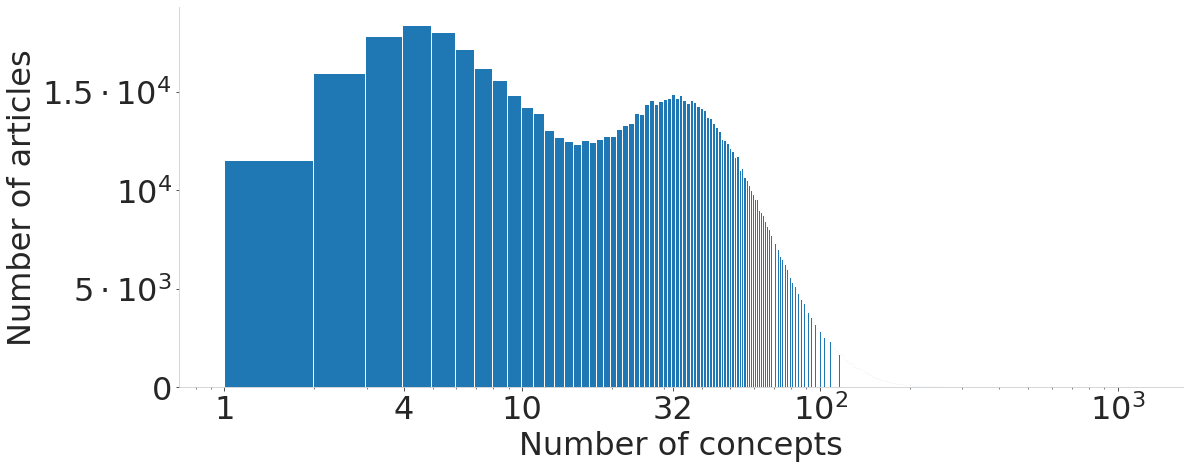

In [5]:
ax = concepts_lens_s.hist(bins=1180)
plt.xlabel('Number of concepts', size=32)
plt.ylabel('Number of articles', size=32)
plt.xscale('log')
plt.xticks([1, 4, 10, 32, 100, 1000], [1, 4, 10, 32, '$10^2$', '$10^3$'])
plt.yticks([0, 5000, 10000, 15000], [0, '$5 \cdot 10^3$', '$10^4$', '$1.5 \cdot 10^4$'])
plt.grid(b=None)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('results/concept_count_per_article.pdf', bbox_inches='tight')

## 2013

In [2]:
g_2013 = pd.read_pickle('./data/g_2013.pkl')
g_2013.vcount(), g_2013.ecount()

(16229, 11139356)

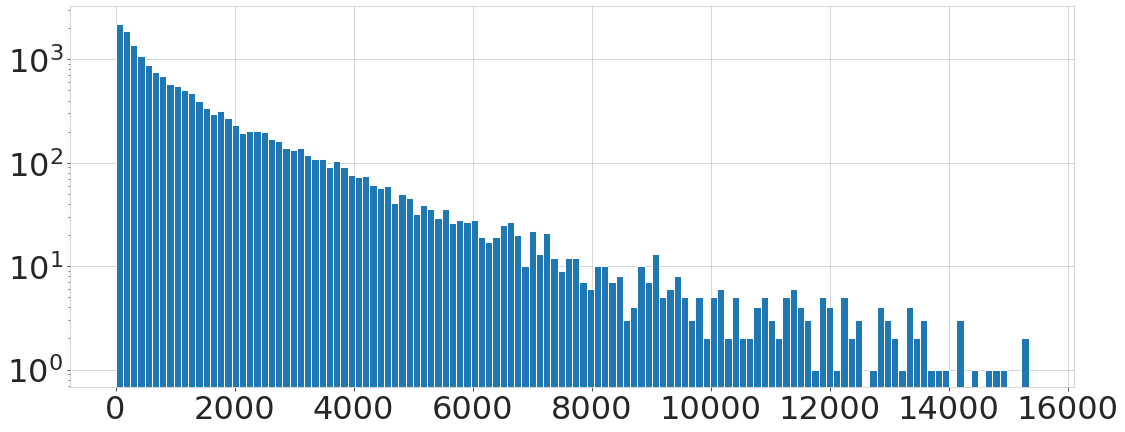

In [7]:
plt.hist(g_2013.degree(), log=True, bins='auto');

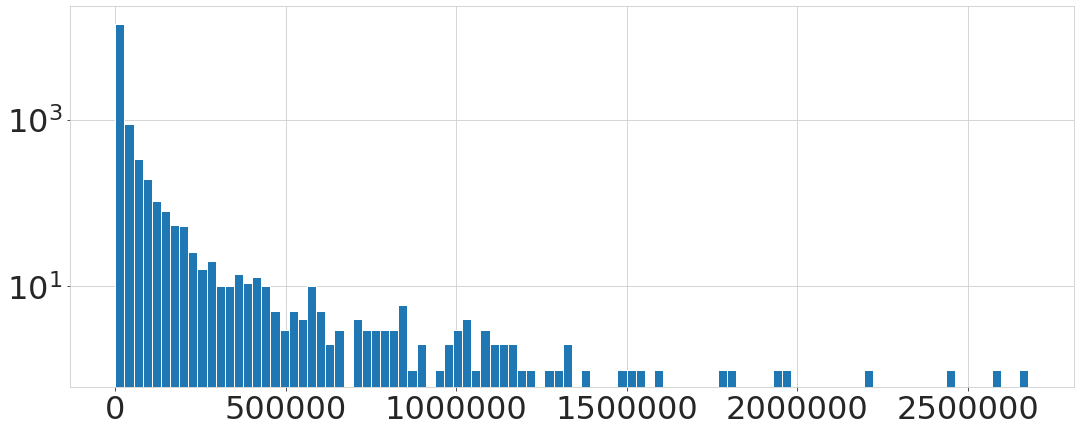

In [8]:
plt.hist(g_2013.vs['strength'], log=True, bins=100);

In [9]:
weight_s = pd.Series(g_2013.es['weight'])
print(weight_s.sum())
weight_s.describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

154154739.0


count    1.113936e+07
mean     1.383875e+01
std      1.023194e+02
min      1.000000e+00
1%       1.000000e+00
5%       1.000000e+00
10%      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      6.000000e+00
90%      2.000000e+01
95%      4.400000e+01
99%      2.000000e+02
max      2.382100e+04
dtype: float64

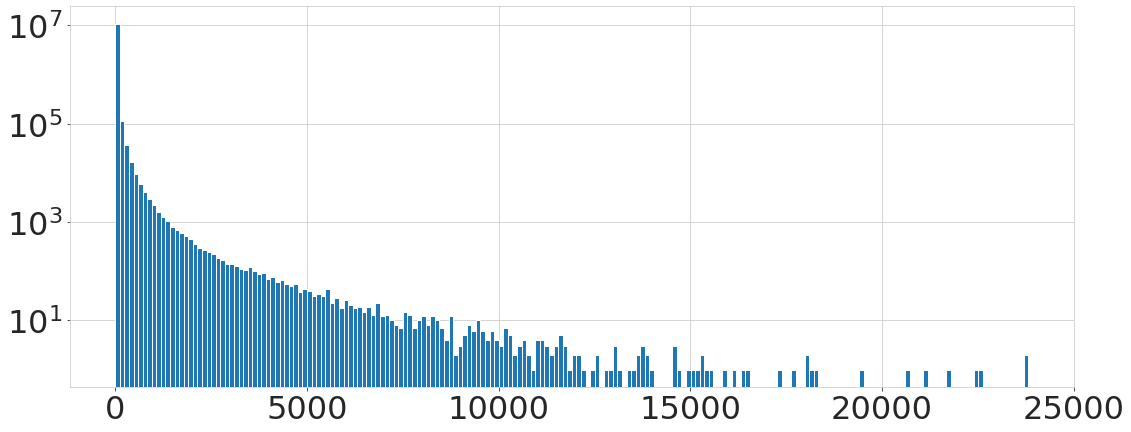

In [10]:
weight_s.hist(log=True, bins=200);

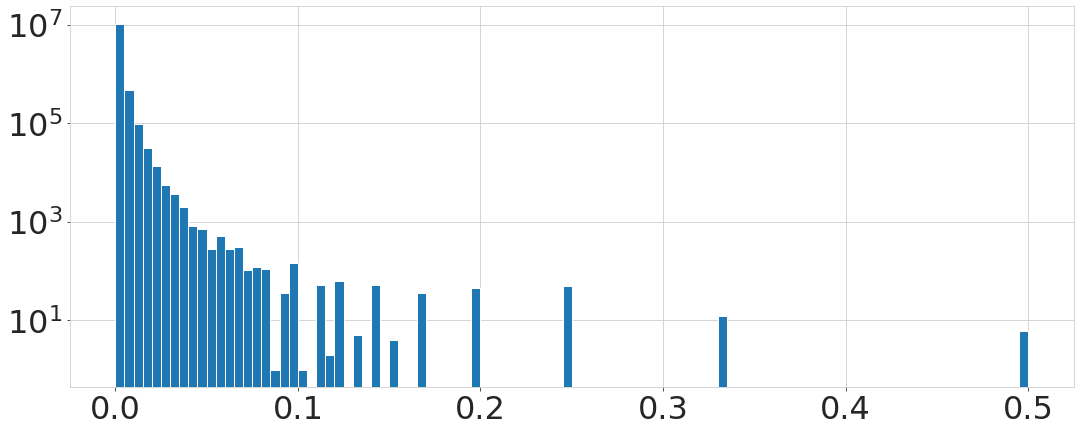

In [11]:
plt.hist(g_2013.es['norm_weight'], log=True, bins=100);

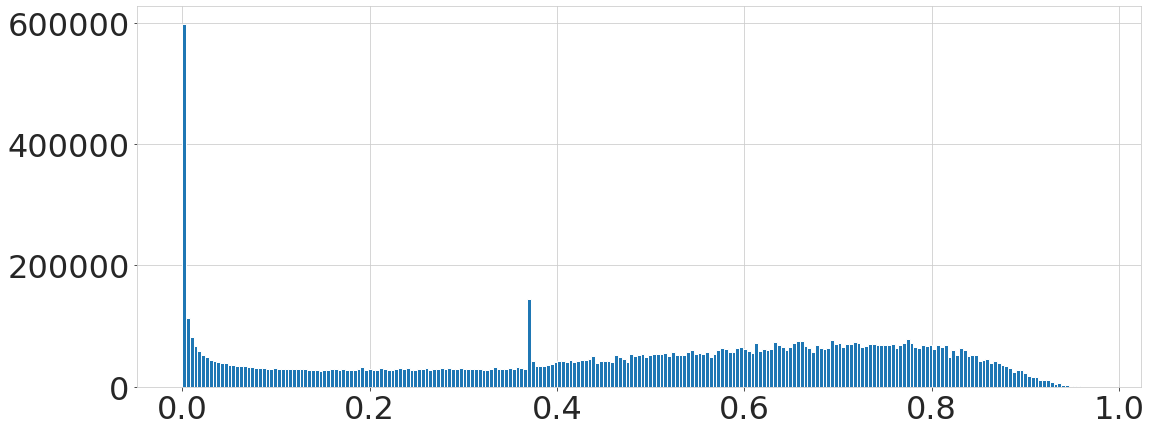

In [12]:
plt.hist(g_2013.es['alpha'], bins='auto');

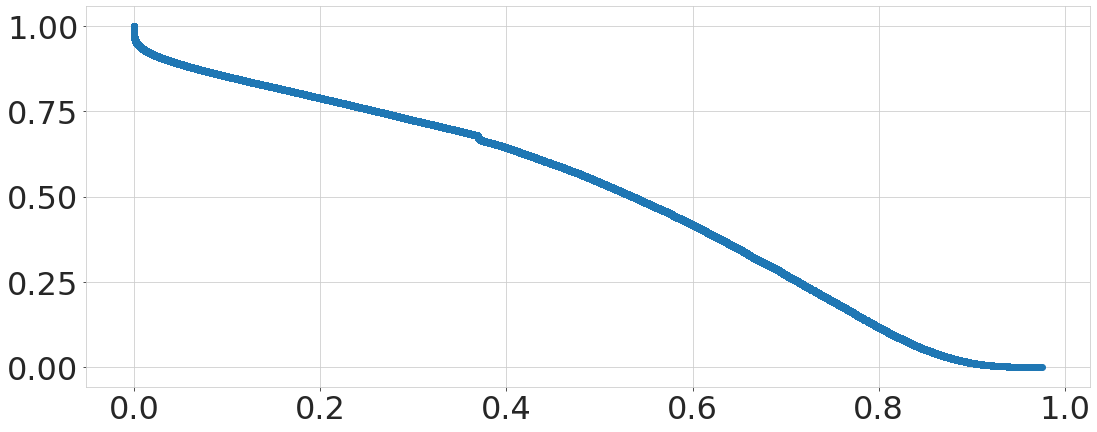

In [54]:
plt.scatter(g_2013.es['alpha'], g_2013.es['alpha_p_value']);

In [13]:
g_2013.density()

0.08459278438332388

In [14]:
np.mean(g_2013.degree())

1372.77170497258

In [15]:
min(g_2013.degree())

2

In [16]:
max(g_2013.degree())

15345

In [17]:
g_2013.average_path_length(directed=False)

1.9168806808117118

In [18]:
g_2013.diameter(directed=False)

3

In [19]:
g_2013.transitivity_avglocal_undirected()

0.7718261752252553

In [20]:
g_2013.transitivity_avglocal_undirected(weights='weight')

0.8864431230694837

In [21]:
g_2013.transitivity_undirected()

0.37157080223861066

In [22]:
g_2013.assortativity_degree(directed=False)

-0.3240229445795549

In [23]:
np.mean(g_2013.knn()[0])

5198.167270003526

In [24]:
np.mean(g_2013.knn(weights='weight')[0])

140992.67503272693

In [25]:
np.mean(g_2013.betweenness(directed=False))

7439.569844106227

In [27]:
np.mean(g_2013.betweenness(directed=False, weights='weight'))

7945.009327964145

In [107]:
ERG = igraph.Graph.Erdos_Renyi(n=g_2013.vcount(), m=g_2013.ecount())

In [108]:
P_k = g_2013.degree_distribution()
P_k = {dd[0]: dd[-1] for dd in P_k.bins()}
P_k = pd.Series(P_k)
len(P_k)

15344

In [109]:
ER_P_k = ERG.degree_distribution()
ER_P_k = {dd[0]: dd[-1] for dd in ER_P_k.bins()}
ER_P_k = pd.Series(ER_P_k)
len(ER_P_k)

298

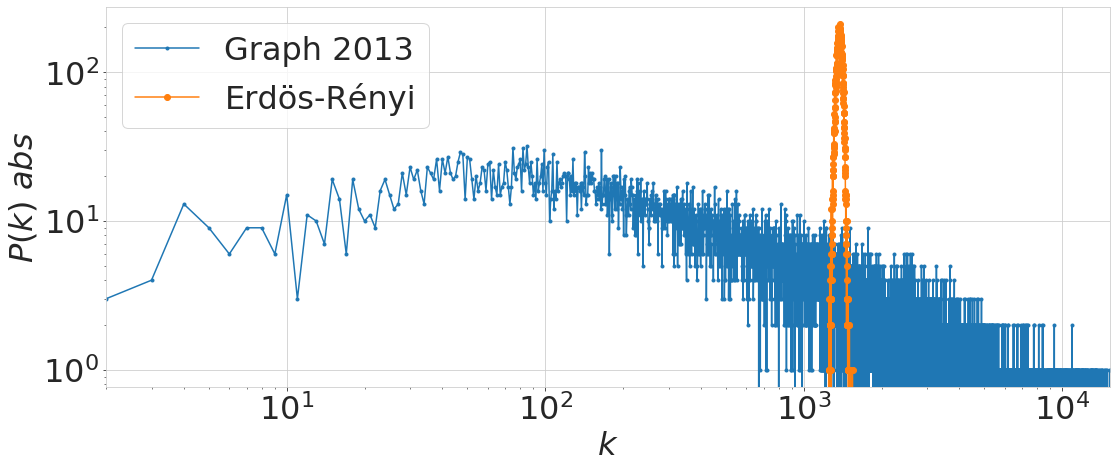

In [110]:
P_k.plot(loglog=True, marker='.')
ER_P_k.plot(loglog=True, marker='o');
# BA_P_k.plot(loglog=True, marker='x');
plt.xlabel('$k$', size=32)
plt.ylabel('$P(k)~abs$', size=32)
plt.legend(['Graph 2013', 'Erdös-Rényi', 'Barabási–Albert'])
plt.savefig('results/P_k.pdf', bbox_inches='tight')

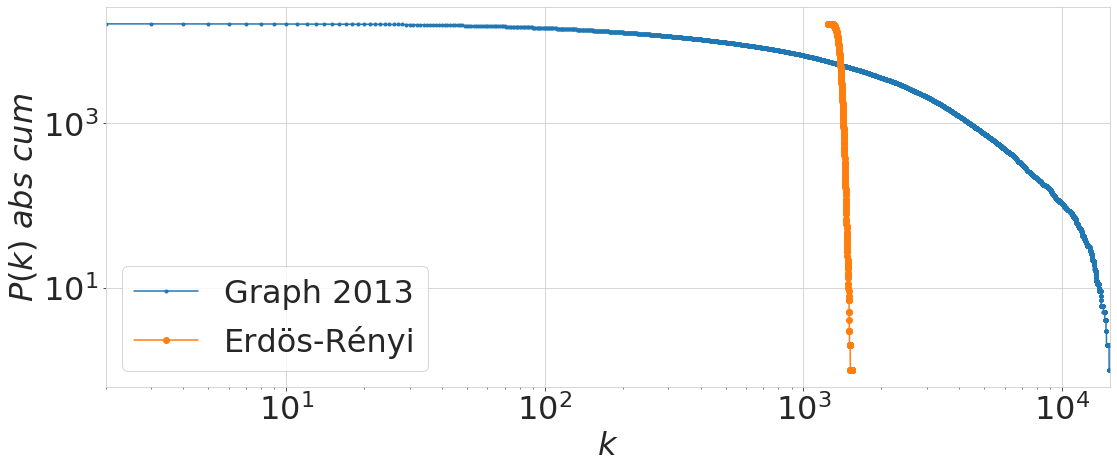

In [111]:
P_k[::-1].cumsum().plot(loglog=True, marker='.')
ER_P_k[::-1].cumsum().plot(loglog=True, marker='o')
# BA_P_k[::-1].cumsum().plot(loglog=True, marker='x')
plt.xlabel('$k$', size=32)
plt.ylabel('$P(k)~abs~cum$', size=32)
plt.legend(['Graph 2013', 'Erdös-Rényi', 'Barabási–Albert'])
plt.savefig('results/P_k_cum.pdf', bbox_inches='tight')

In [95]:
g_2013_transitivity_local_undirected = g_2013.transitivity_local_undirected()
len(g_2013_transitivity_local_undirected)

16229

In [96]:
P_C = sorted(map(np.mean, g_2013_transitivity_local_undirected))
P_C = [_ for _ in P_C if not np.isnan(_)]
ER_P_C = sorted(map(np.mean, ERG.transitivity_local_undirected()))
ER_P_C = [_ for _ in ER_P_C if not np.isnan(_)]
# BA_P_C = sorted(map(np.mean, BAG.transitivity_local_undirected()))
# BA_P_C = [_ for _ in BA_P_C if not np.isnan(_)]
len(P_C), len(ER_P_C)#, len(BA_P_C)

(16229, 13969)

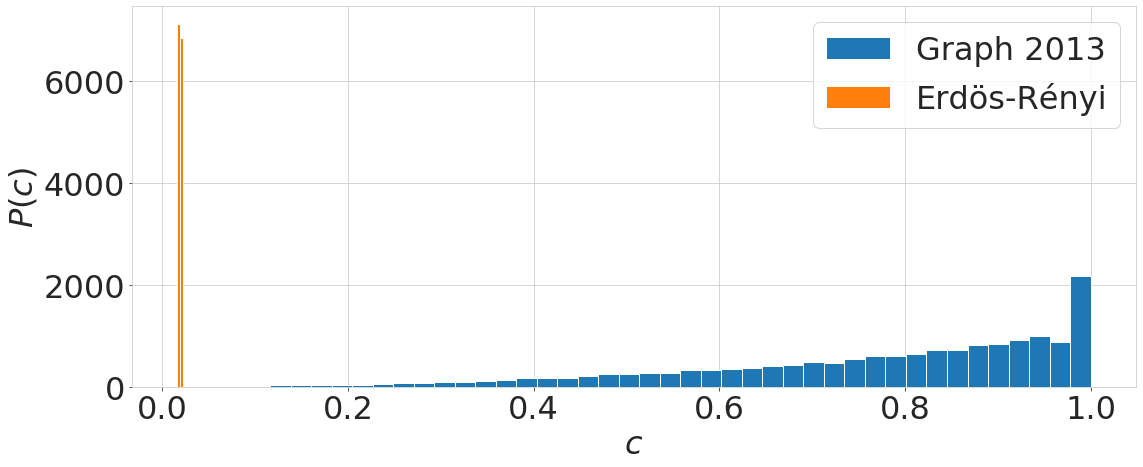

In [97]:
plt.hist(P_C, bins='auto')
plt.hist(ER_P_C, bins=2)
# plt.hist(BA_P_C, bins='auto')
plt.xlabel('$c$', size=32)
plt.ylabel('$P(c)$', size=32)
plt.legend(['Graph 2013', 'Erdös-Rényi', 'Barabási–Albert']);

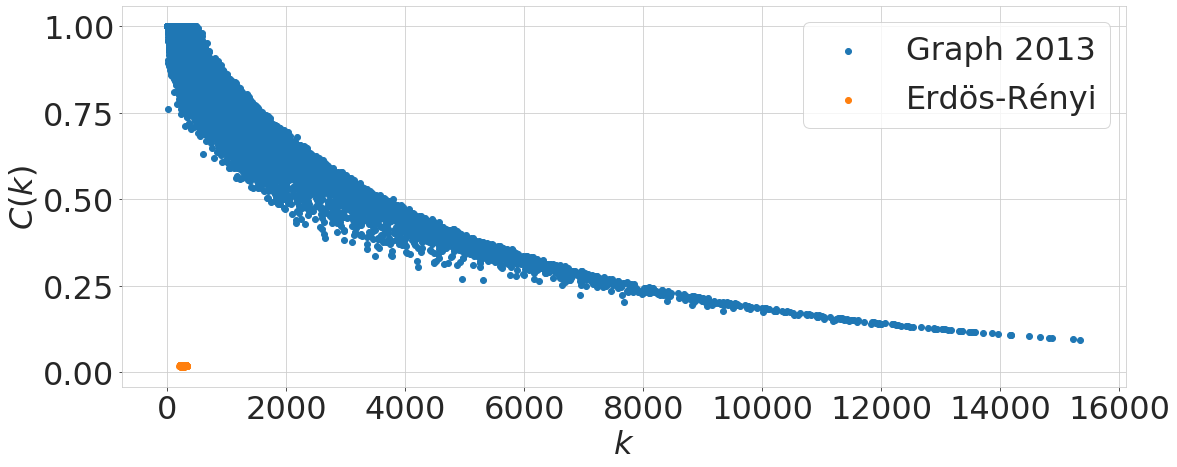

In [98]:
Y = [_ for _ in g_2013_transitivity_local_undirected if not np.isnan(_)]
X = [_ for _ in g_2013.degree() if _ > 1]  # 2+, ommit 1
plt.scatter(X, Y)
Y = [_ for _ in ERG.transitivity_local_undirected() if not np.isnan(_)]
X = [_ for _ in ERG.degree() if _ > 1]  # 2+, ommit 1
plt.scatter(X, Y)
plt.xlabel('$k$', size=32)
plt.ylabel('$C(k)$', size=32)
plt.legend(['Graph 2013', 'Erdös-Rényi', 'Barabási–Albert'])
plt.savefig('results/C_k.pdf', bbox_inches='tight')

### filtred by weight

We set stat. sign. weight == 10 (might be change)

In [99]:
ew_threshold = 10

In [100]:
g_2013_filtered = g_2013.subgraph_edges(g_2013.es.select(weight_gt=ew_threshold))
g_2013_filtered.vcount(), g_2013_filtered.ecount()

(9999, 1844453)

% of total links left

In [81]:
g_2013_filtered.ecount() / g_2013.ecount()

0.16557985937427622

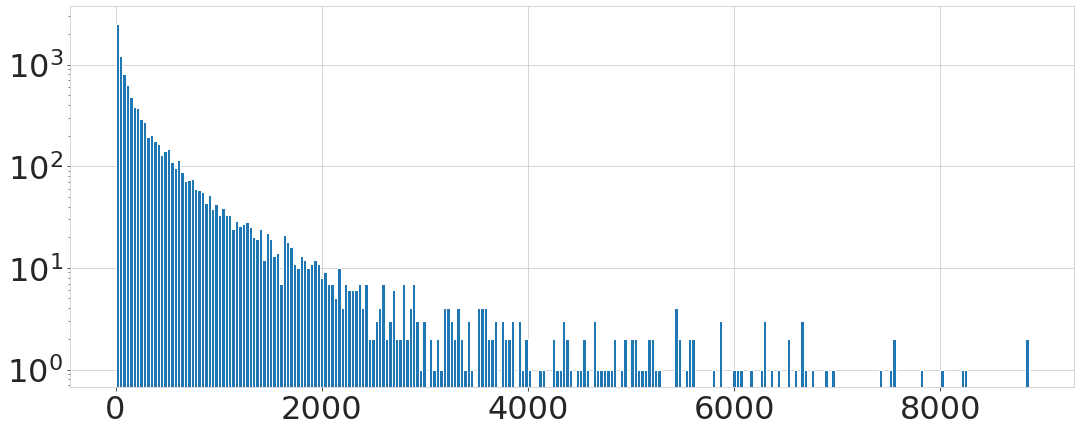

In [40]:
plt.hist(g_2013_filtered.degree(), log=True, bins='auto');

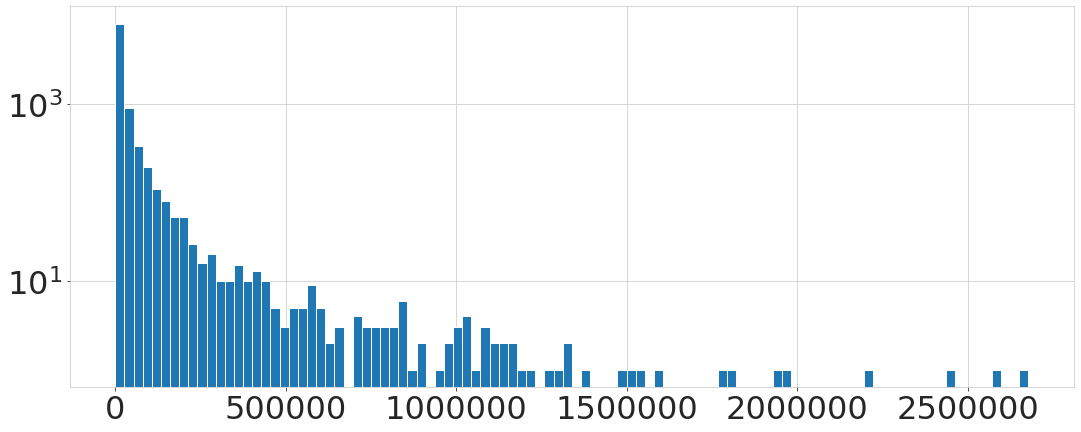

In [41]:
plt.hist(g_2013_filtered.vs['strength'], log=True, bins=100);

In [42]:
weight_s = pd.Series(g_2013_filtered.es['weight'])
print(weight_s.sum())
weight_s.describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

130915519.0


count    1.844453e+06
mean     7.097796e+01
std      2.434969e+02
min      1.100000e+01
1%       1.100000e+01
5%       1.100000e+01
10%      1.200000e+01
25%      1.500000e+01
50%      2.500000e+01
75%      5.400000e+01
90%      1.300000e+02
95%      2.330000e+02
99%      7.640000e+02
max      2.382100e+04
dtype: float64

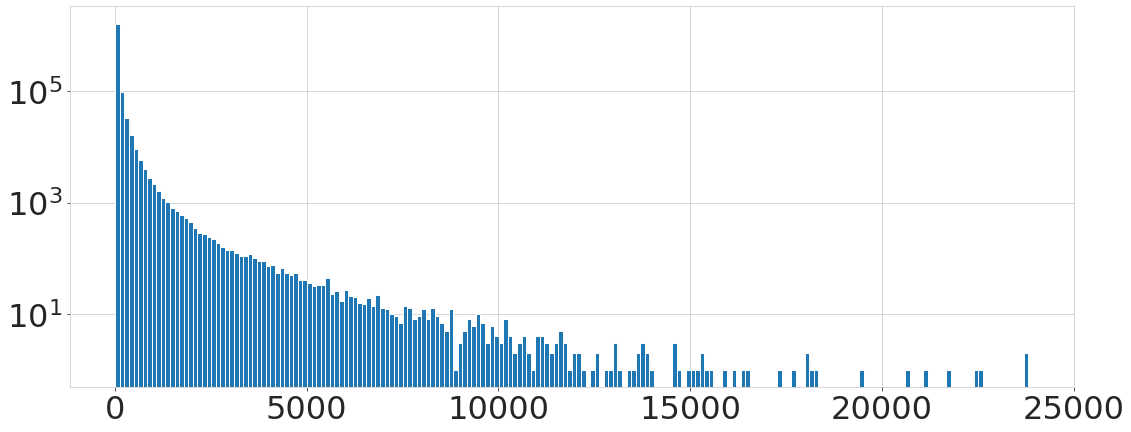

In [43]:
weight_s.hist(log=True, bins=200);

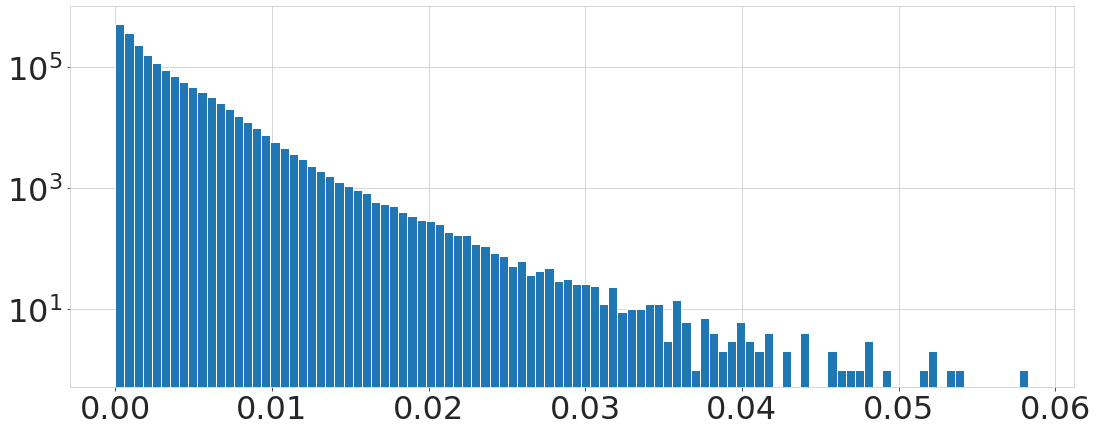

In [44]:
plt.hist(g_2013_filtered.es['norm_weight'], log=True, bins=100);

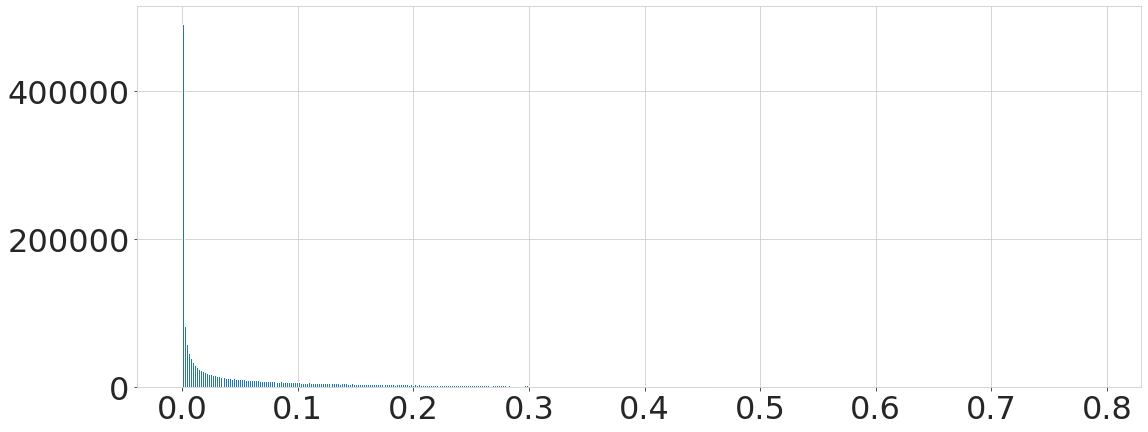

In [45]:
plt.hist(g_2013_filtered.es['alpha'], bins='auto');

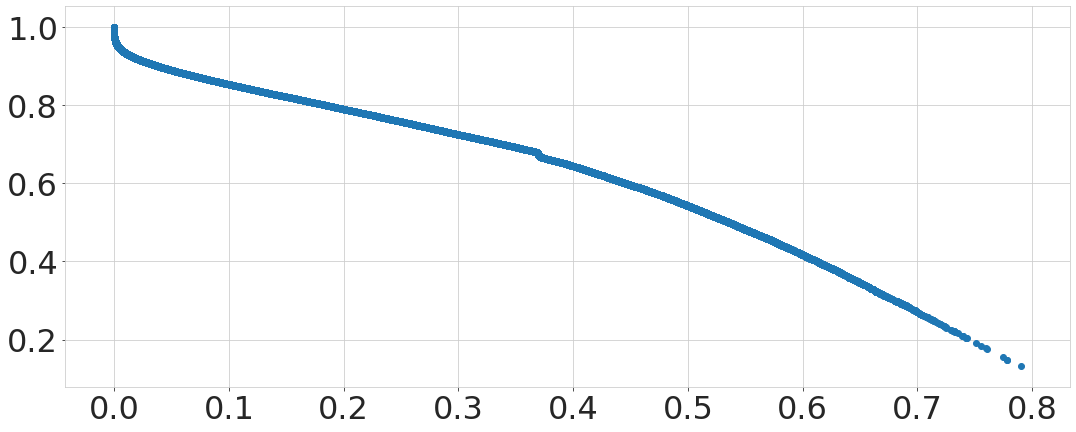

In [46]:
plt.scatter(g_2013_filtered.es['alpha'], g_2013_filtered.es['alpha_p_value']);

In [47]:
g_2013_filtered.density()

0.03690012930078765

In [48]:
np.mean(g_2013_filtered.degree())

368.9274927492749

In [49]:
min(g_2013_filtered.degree())

1

In [50]:
max(g_2013_filtered.degree())

8856

In [87]:
g_2013_filtered.average_path_length(directed=False)

1.9961402421498402

In [88]:
g_2013_filtered.diameter(directed=False)

4

In [51]:
g_2013_filtered.transitivity_avglocal_undirected()

0.8936203403627114

In [89]:
g_2013_filtered.transitivity_avglocal_undirected(weights='weight')

nan

In [52]:
g_2013_filtered.transitivity_undirected()

0.2804009139923703

In [53]:
g_2013_filtered.assortativity_degree(directed=False)

-0.38956993718468635

In [54]:
np.mean(g_2013_filtered.knn()[0])

3666.9098699225724

In [55]:
np.mean(g_2013_filtered.knn(weights='weight')[0])

37855.42685922403

In [ ]:
np.mean(g_2013_filtered.betweenness(directed=False))

In [ ]:
np.mean(g_2013_filtered.betweenness(directed=False, weights='weight'))

In [112]:
ERG = igraph.Graph.Erdos_Renyi(n=g_2013_filtered.vcount(), m=g_2013_filtered.ecount())

In [113]:
P_k = g_2013_filtered.degree_distribution()
P_k = {dd[0]: dd[-1] for dd in P_k.bins()}
P_k = pd.Series(P_k)
len(P_k)

8856

In [114]:
ER_P_k = ERG.degree_distribution()
ER_P_k = {dd[0]: dd[-1] for dd in ER_P_k.bins()}
ER_P_k = pd.Series(ER_P_k)
len(ER_P_k)

147

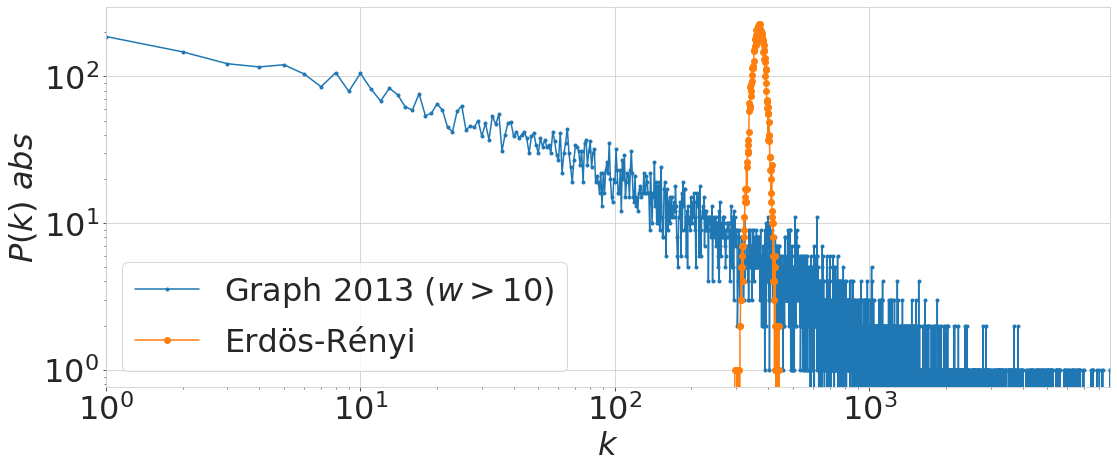

In [115]:
P_k.plot(loglog=True, marker='.')
ER_P_k.plot(loglog=True, marker='o');
# BA_P_k.plot(loglog=True, marker='x');
plt.xlabel('$k$', size=32)
plt.ylabel('$P(k)~abs$', size=32)
plt.legend([fr'Graph 2013 ($w > {ew_threshold}$)', 'Erdös-Rényi', 'Barabási–Albert'])
plt.savefig('results/P_k_filtered.pdf', bbox_inches='tight')

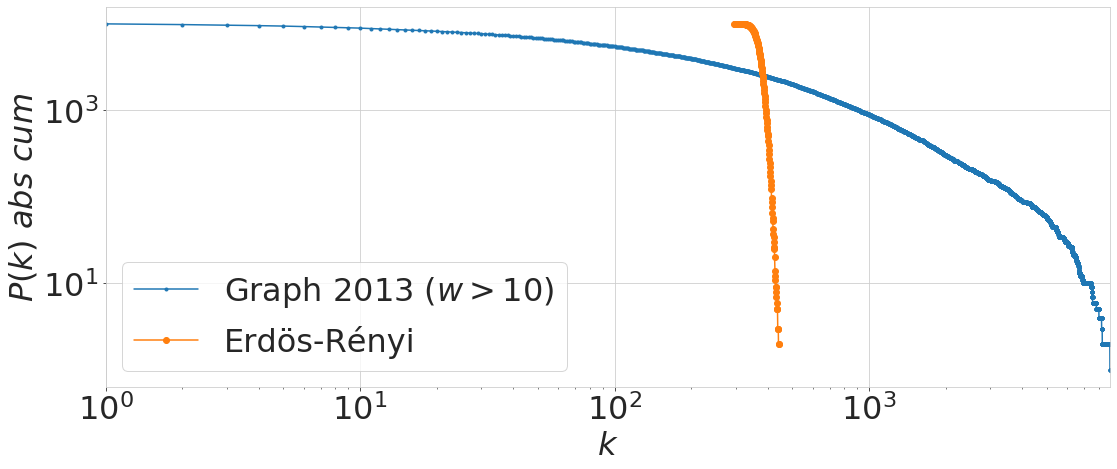

In [116]:
P_k[::-1].cumsum().plot(loglog=True, marker='.')
ER_P_k[::-1].cumsum().plot(loglog=True, marker='o')
# BA_P_k[::-1].cumsum().plot(loglog=True, marker='x')
plt.xlabel('$k$', size=32)
plt.ylabel('$P(k)~abs~cum$', size=32)
plt.legend([fr'Graph 2013 ($w > {ew_threshold}$)', 'Erdös-Rényi', 'Barabási–Albert'])
plt.savefig('results/P_k_cum_filtered.pdf', bbox_inches='tight')

In [117]:
g_2013_filtered_transitivity_local_undirected = g_2013_filtered.transitivity_local_undirected()
len(g_2013_filtered_transitivity_local_undirected)

9999

In [118]:
P_C = sorted(map(np.mean, g_2013_filtered_transitivity_local_undirected))
P_C = [_ for _ in P_C if not np.isnan(_)]
ER_P_C = sorted(map(np.mean, ERG.transitivity_local_undirected()))
ER_P_C = [_ for _ in ER_P_C if not np.isnan(_)]
# BA_P_C = sorted(map(np.mean, BAG.transitivity_local_undirected()))
# BA_P_C = [_ for _ in BA_P_C if not np.isnan(_)]
len(P_C), len(ER_P_C)#, len(BA_P_C)

(9812, 9999)

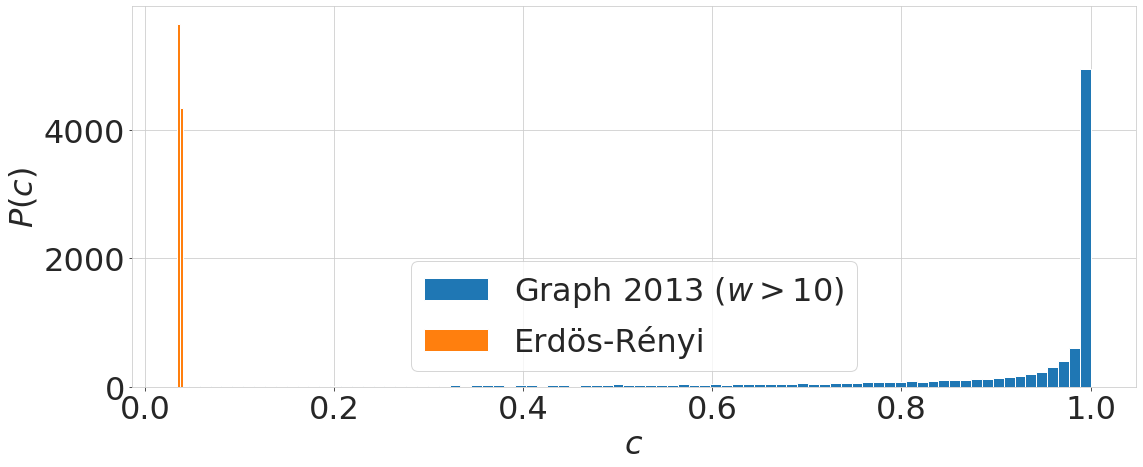

In [119]:
plt.hist(P_C, bins='auto')
plt.hist(ER_P_C, bins=2)
# plt.hist(BA_P_C, bins='auto')
plt.xlabel('$c$', size=32)
plt.ylabel('$P(c)$', size=32)
plt.legend([fr'Graph 2013 ($w > {ew_threshold}$)', 'Erdös-Rényi', 'Barabási–Albert']);

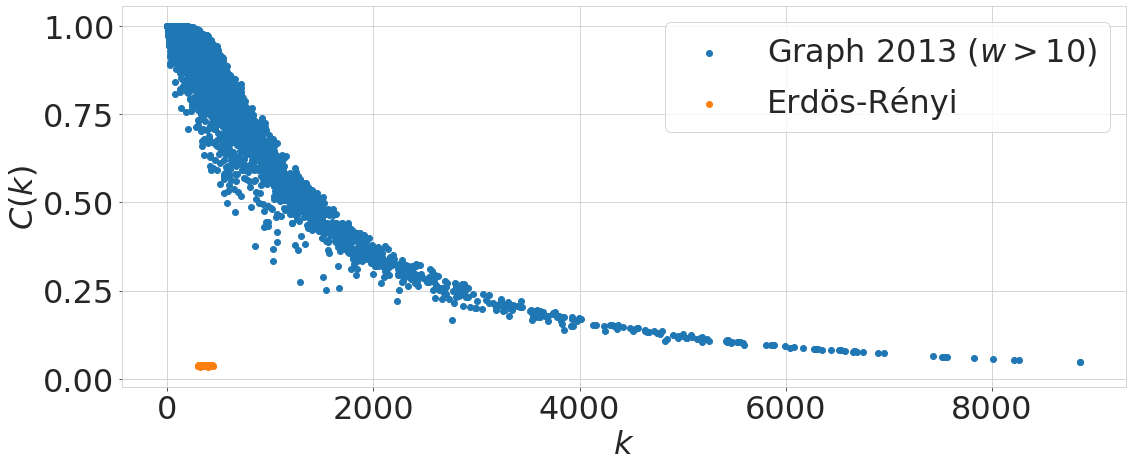

In [120]:
Y = [_ for _ in g_2013_filtered_transitivity_local_undirected if not np.isnan(_)]
X = [_ for _ in g_2013_filtered.degree() if _ > 1]  # 2+, ommit 1
plt.scatter(X, Y)
Y = [_ for _ in ERG.transitivity_local_undirected() if not np.isnan(_)]
X = [_ for _ in ERG.degree() if _ > 1]  # 2+, ommit 1
plt.scatter(X, Y)
plt.xlabel('$k$', size=32)
plt.ylabel('$C(k)$', size=32)
plt.legend([fr'Graph 2013 ($w > {ew_threshold}$)', 'Erdös-Rényi', 'Barabási–Albert'])
plt.savefig('results/C_k_filtered.pdf', bbox_inches='tight')

### filtred by alpha

We set stat. sign. p-value for alpha top 15% (might be change)

In [122]:
ea_threshold = .1

In [123]:
g_2013_filtered = g_2013.subgraph_edges(g_2013.es.select(alpha_lt=ea_threshold))
g_2013_filtered.vcount(), g_2013_filtered.ecount()

(13358, 1642958)

% of total links left

In [124]:
g_2013_filtered.ecount() / g_2013.ecount()

0.1474912912380213

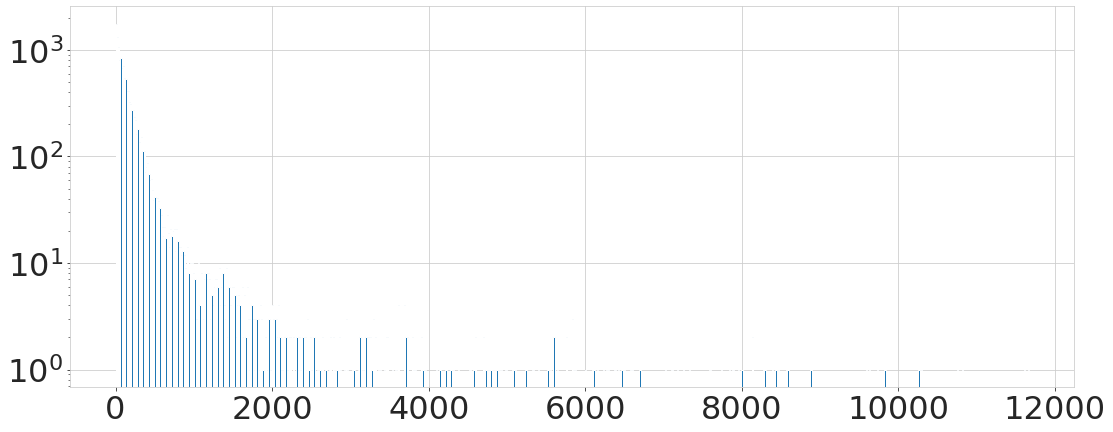

In [7]:
plt.hist(g_2013_filtered.degree(), log=True, bins='auto');

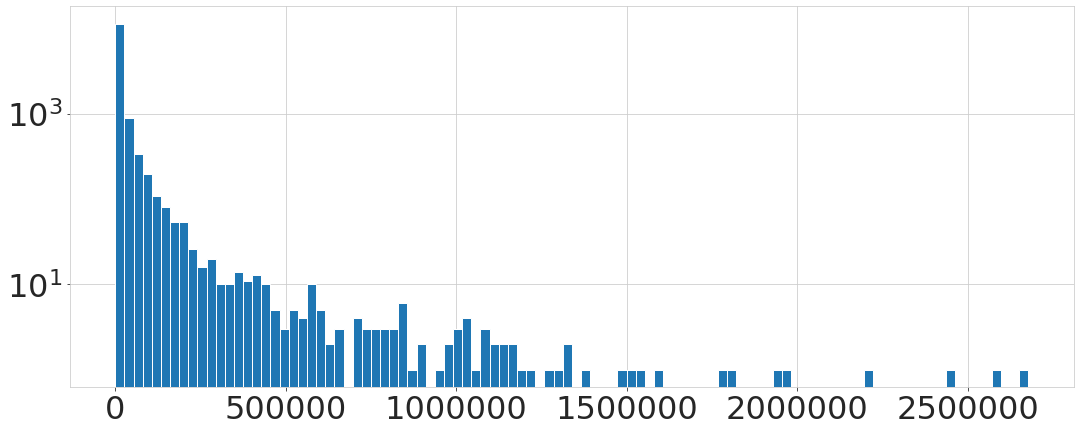

In [8]:
plt.hist(g_2013_filtered.vs['strength'], log=True, bins=100);

In [9]:
weight_s = pd.Series(g_2013_filtered.es['weight'])
print(weight_s.sum())
weight_s.describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

124810966.0


count    1.642958e+06
mean     7.596723e+01
std      2.576017e+02
min      3.000000e+00
1%       4.000000e+00
5%       6.000000e+00
10%      8.000000e+00
25%      1.400000e+01
50%      2.700000e+01
75%      6.100000e+01
90%      1.440000e+02
95%      2.560000e+02
99%      8.250000e+02
max      2.382100e+04
dtype: float64

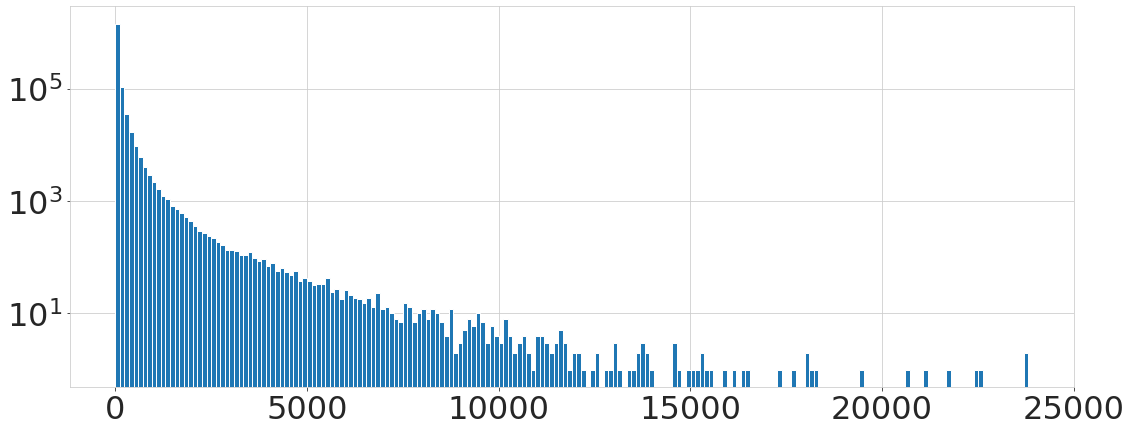

In [10]:
weight_s.hist(log=True, bins=200);

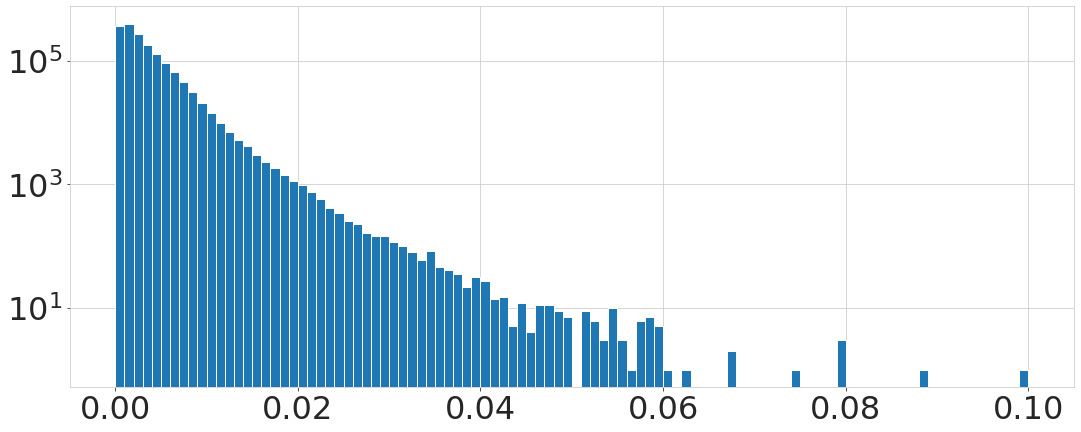

In [11]:
plt.hist(g_2013_filtered.es['norm_weight'], log=True, bins=100);

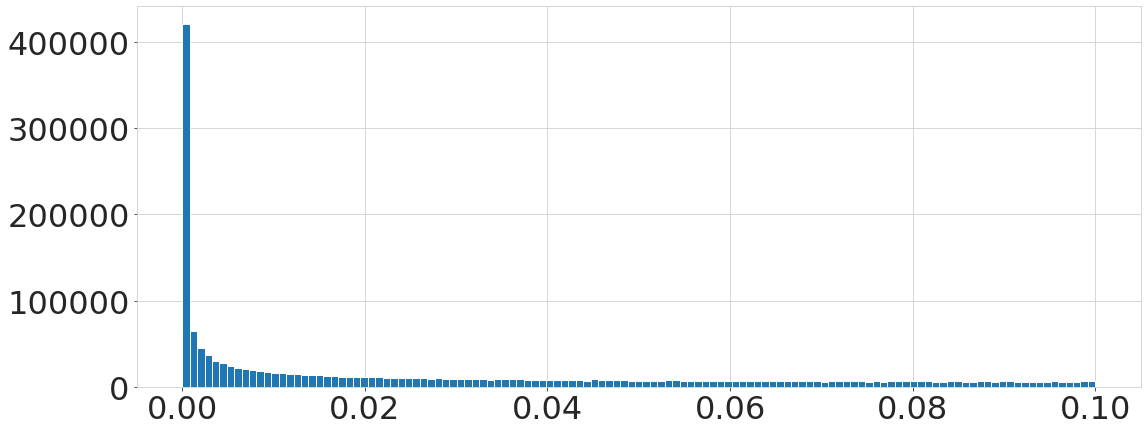

In [12]:
plt.hist(g_2013_filtered.es['alpha'], bins='auto');

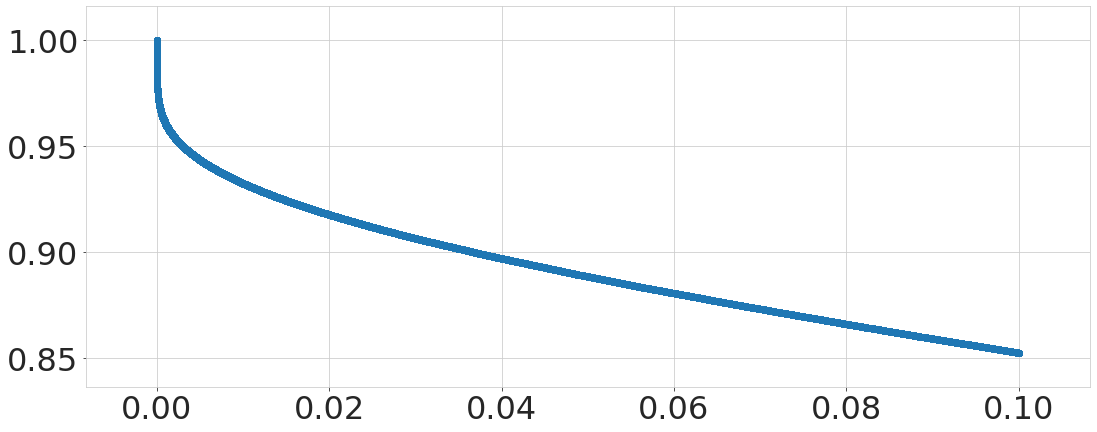

In [13]:
plt.scatter(g_2013_filtered.es['alpha'], g_2013_filtered.es['alpha_p_value']);

In [14]:
g_2013_filtered.density()

0.018416457367002738

In [15]:
np.mean(g_2013_filtered.degree())

245.98862105105556

In [16]:
min(g_2013_filtered.degree())

1

In [17]:
max(g_2013_filtered.degree())

11665

In [33]:
g_2013_filtered.average_path_length(directed=False)

2.0107308255201413

In [34]:
g_2013_filtered.diameter(directed=False)

4

In [18]:
g_2013_filtered.transitivity_avglocal_undirected()

0.8964823824933694

In [ ]:
g_2013_filtered.transitivity_avglocal_undirected(weights='weight')

In [19]:
g_2013_filtered.transitivity_undirected()

0.14090149914372513

In [20]:
g_2013_filtered.assortativity_degree(directed=False)

-0.3752142757169204

In [21]:
np.mean(g_2013_filtered.knn()[0])

4236.210465122067

In [22]:
np.mean(g_2013_filtered.knn(weights='weight')[0])

86401.50559584763

In [ ]:
np.mean(g_2013_filtered.betweenness(directed=False))

In [ ]:
np.mean(g_2013_filtered.betweenness(directed=False, weights='weight'))

In [23]:
ERG = igraph.Graph.Erdos_Renyi(n=g_2013_filtered.vcount(), m=g_2013_filtered.ecount())

In [24]:
P_k = g_2013_filtered.degree_distribution()
P_k = {dd[0]: dd[-1] for dd in P_k.bins()}
P_k = pd.Series(P_k)
len(P_k)

11665

In [25]:
ER_P_k = ERG.degree_distribution()
ER_P_k = {dd[0]: dd[-1] for dd in ER_P_k.bins()}
ER_P_k = pd.Series(ER_P_k)
len(ER_P_k)

121

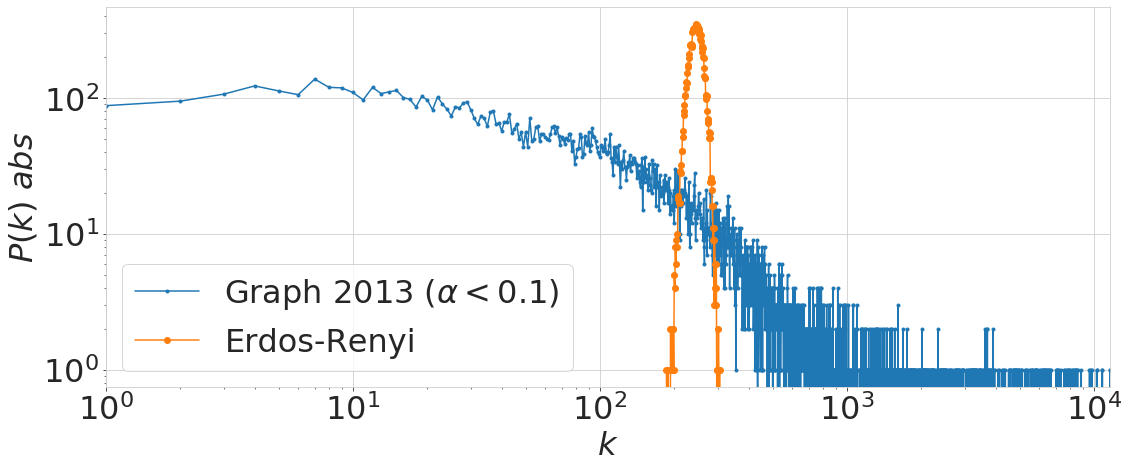

In [27]:
P_k.plot(loglog=True, marker='.')
ER_P_k.plot(loglog=True, marker='o');
# BA_P_k.plot(loglog=True, marker='x');
plt.xlabel('$k$', size=32)
plt.ylabel('$P(k)~abs$', size=32)
plt.legend([fr'Graph 2013 ($\alpha < {ea_threshold}$)', 'Erdos-Renyi', 'Barabási–Albert']);
# plt.savefig('results/P_k.pdf', bbox_inches='tight')

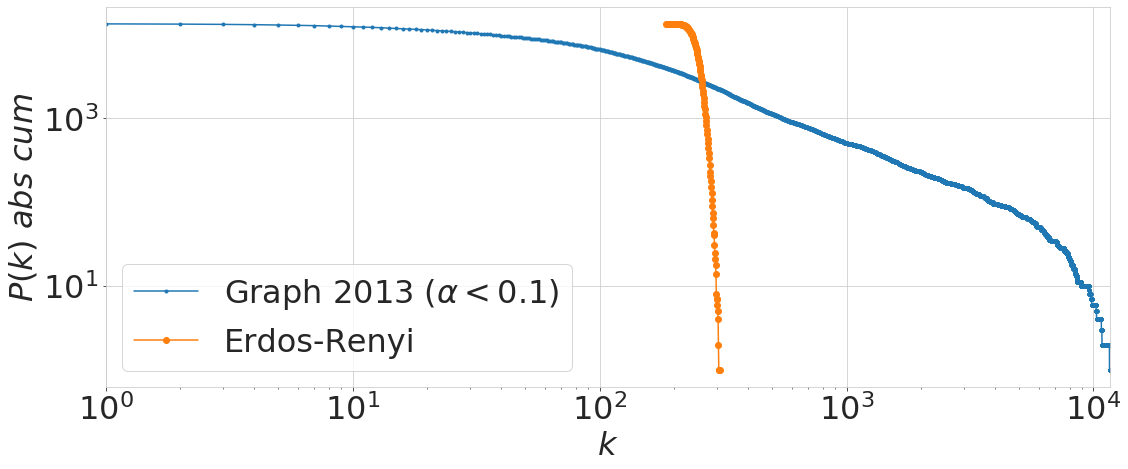

In [28]:
P_k[::-1].cumsum().plot(loglog=True, marker='.')
ER_P_k[::-1].cumsum().plot(loglog=True, marker='o')
# BA_P_k[::-1].cumsum().plot(loglog=True, marker='x')
plt.xlabel('$k$', size=32)
plt.ylabel('$P(k)~abs~cum$', size=32)
plt.legend([fr'Graph 2013 ($\alpha < {ea_threshold}$)', 'Erdos-Renyi', 'Barabási–Albert']);
# plt.savefig('results/P_k_cum.pdf', bbox_inches='tight')

In [29]:
g_2013_filtered_transitivity_local_undirected = g_2013_filtered.transitivity_local_undirected()
len(g_2013_filtered_transitivity_local_undirected)

13358

In [30]:
P_C = sorted(map(np.mean, g_2013_filtered_transitivity_local_undirected))
P_C = [_ for _ in P_C if not np.isnan(_)]
ER_P_C = sorted(map(np.mean, ERG.transitivity_local_undirected()))
ER_P_C = [_ for _ in ER_P_C if not np.isnan(_)]
# BA_P_C = sorted(map(np.mean, BAG.transitivity_local_undirected()))
# BA_P_C = [_ for _ in BA_P_C if not np.isnan(_)]
len(P_C), len(ER_P_C)#, len(BA_P_C)

(13270, 13358)

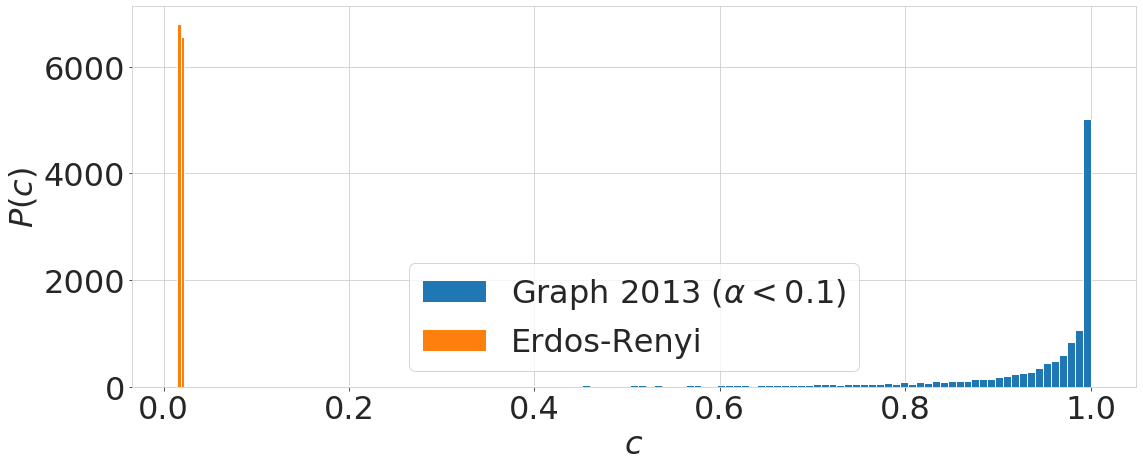

In [31]:
plt.hist(P_C, bins='auto')
plt.hist(ER_P_C, bins=2)
# plt.hist(BA_P_C, bins='auto')
plt.xlabel('$c$', size=32)
plt.ylabel('$P(c)$', size=32)
plt.legend([fr'Graph 2013 ($\alpha < {ea_threshold}$)', 'Erdos-Renyi', 'Barabási–Albert']);

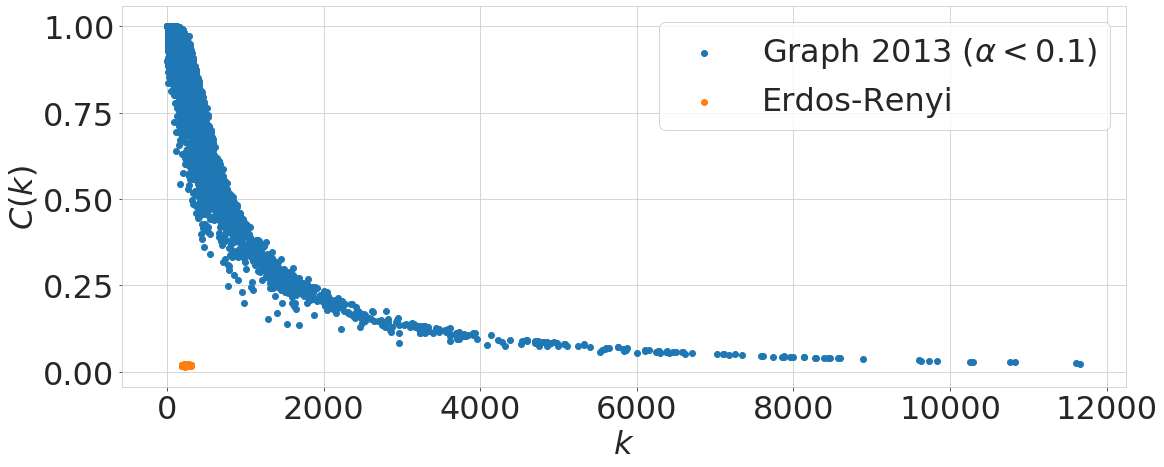

In [32]:
Y = [_ for _ in g_2013_filtered_transitivity_local_undirected if not np.isnan(_)]
X = [_ for _ in g_2013_filtered.degree() if _ > 1]  # 2+, ommit 1
plt.scatter(X, Y)
Y = [_ for _ in ERG.transitivity_local_undirected() if not np.isnan(_)]
X = [_ for _ in ERG.degree() if _ > 1]  # 2+, ommit 1
plt.scatter(X, Y)
plt.xlabel('$k$', size=32)
plt.ylabel('$C(k)$', size=32)
plt.legend([fr'Graph 2013 ($\alpha < {ea_threshold}$)', 'Erdos-Renyi', 'Barabási–Albert']);
# plt.savefig('results/C_k_filtered.pdf', bbox_inches='tight')

### form pairs

#### weights

In [3]:
ew_2013 = np.zeros((g_2013.vcount(), g_2013.vcount()))
for e in tn(g_2013.es):
    ew_2013[e.source][e.target] = e['weight']
    ew_2013[e.target][e.source] = e['weight']
# ew_2013 = pd.DataFrame(ew_2013, index=map(lambda x: CONCEPTS_ID_NAME_DICT.get(int(x)), g_2013.vs['name']),
#                        columns=map(lambda x: CONCEPTS_ID_NAME_DICT.get(int(x)), g_2013.vs['name'])).astype(int)
ew_2013 = pd.DataFrame(ew_2013, index=map(int, g_2013.vs['name']),
                       columns=map(int, g_2013.vs['name'])).astype(int)
sorted_names = ew_2013.index[~ew_2013.index.isna()].sort_values()
ew_2013 = ew_2013.loc[sorted_names, sorted_names]
ew_2013.to_pickle('./data/ew_2013_df.pkl')
ew_2013

,3,4,5,6,7,9,10,11,14,15,...,204839,204844,204848,204850,204851,204853,204856,204867,204881,204883
3,0,0,5,0,2,43,19,104,19,0,...,1,2,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,1,1,7,2,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,43,0,1,0,0,0,4,15,6,0,...,0,0,0,0,0,0,0,0,0,0
10,19,0,1,0,0,4,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
11,104,0,7,0,0,15,5,0,20,0,...,1,0,0,0,0,0,0,0,0,0
14,19,0,2,0,0,6,0,20,0,7,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,7,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
ew_2013_s = ew_2013.where(np.triu(np.ones(ew_2013.shape), 1).astype(np.bool)).stack()
ew_2013_s.to_pickle('./data/ew_2013_s.pkl')
ew_2013_s[ew_2013_s > 0].describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

count    1.113936e+07
mean     1.383875e+01
std      1.023194e+02
min      1.000000e+00
1%       1.000000e+00
5%       1.000000e+00
10%      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      6.000000e+00
90%      2.000000e+01
95%      4.400000e+01
99%      2.000000e+02
max      2.382100e+04
dtype: float64

% of zero weighted pairs

In [5]:
(ew_2013_s == 0).sum() / ew_2013_s.shape[0]

0.9154072156166762

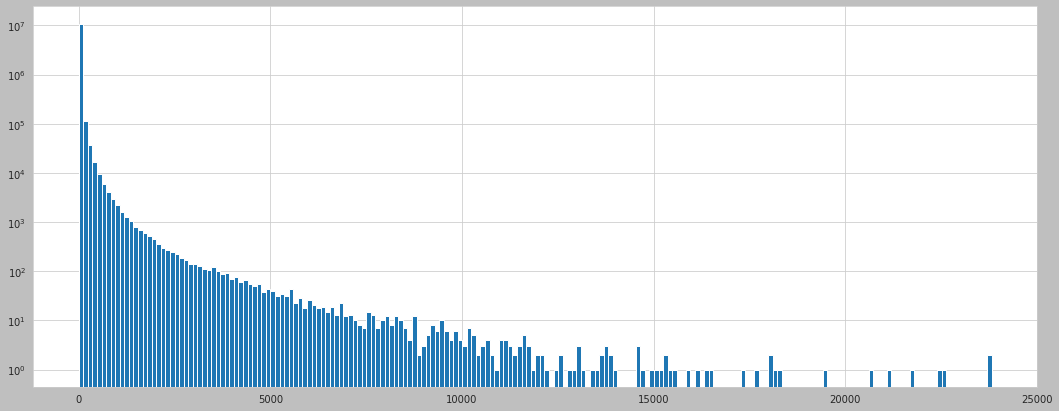

In [6]:
ew_2013_s[ew_2013_s > 0].hist(log=True, bins=200);

#### alpha

In [7]:
ea_2013 = np.ones((g_2013.vcount(), g_2013.vcount()))
for e in tn(g_2013.es):
    ea_2013[e.source][e.target] = e['alpha']
    ea_2013[e.target][e.source] = e['alpha']
# ea_2013 = pd.DataFrame(ea_2013, index=map(lambda x: CONCEPTS_ID_NAME_DICT.get(int(x)), g_2013.vs['name']),
#                        columns=map(lambda x: CONCEPTS_ID_NAME_DICT.get(int(x)), g_2013.vs['name']))
ea_2013 = pd.DataFrame(ea_2013, index=map(int, g_2013.vs['name']),
                       columns=map(int, g_2013.vs['name']))
sorted_names = ea_2013.index[~ea_2013.index.isna()].sort_values()
ea_2013 = ea_2013.loc[sorted_names, sorted_names]
ea_2013.to_pickle('./data/ea_2013_df.pkl')
ea_2013

,3,4,5,6,7,9,10,11,14,15,...,204839,204844,204848,204850,204851,204853,204856,204867,204881,204883
3,1.000000,1.000000,0.336271,1.0,0.414341,0.000483,0.017647,0.000324,0.146021,1.000000,...,0.598154,0.504061,1.000000,1.00000,1.000000,1.000000,0.370225,1.0,1.0,1.0
4,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.0,1.0,1.0
5,0.336271,1.000000,1.000000,1.0,1.000000,0.804201,0.804201,0.217405,0.646719,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.0,1.0,1.0
6,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.0,1.0,1.0
7,0.414341,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.368754,1.00000,1.000000,1.000000,1.000000,1.0,1.0,1.0
9,0.000483,1.000000,0.804201,1.0,1.000000,1.000000,0.427853,0.069931,0.345189,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.0,1.0,1.0
10,0.017647,1.000000,0.804201,1.0,1.000000,0.427853,1.000000,0.346006,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.0,1.0,1.0
11,0.000324,1.000000,0.217405,1.0,1.000000,0.069931,0.346006,1.000000,0.131952,1.000000,...,0.598154,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.0,1.0,1.0
14,0.146021,1.000000,0.646719,1.0,1.000000,0.345189,1.000000,0.131952,1.000000,0.038555,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.0,1.0,1.0
15,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.038555,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.0,1.0,1.0


In [8]:
ea_2013_s = ea_2013.where(np.triu(np.ones(ea_2013.shape), 1).astype(np.bool)).stack()
ea_2013_s.to_pickle('./data/ea_2013_s.pkl')
ea_2013_s.describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

count    1.316821e+08
mean     9.562488e-01
std      1.644263e-01
min      0.000000e+00
1%       5.851966e-02
5%       6.055800e-01
10%      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
90%      1.000000e+00
95%      1.000000e+00
99%      1.000000e+00
max      1.000000e+00
dtype: float64

% of zero weighted pairs

In [9]:
(ea_2013_s == 1).sum() / ea_2013_s.shape[0]

0.9154072156166762

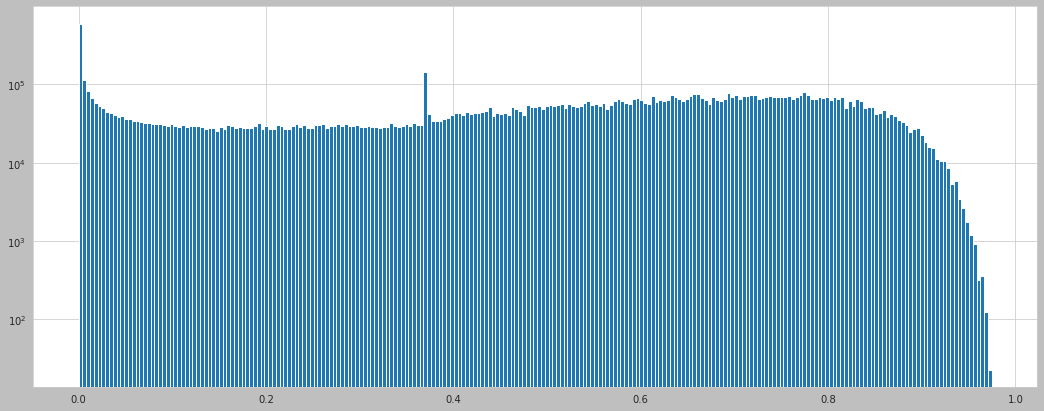

In [10]:
ea_2013_s[ea_2013_s < 1].hist(log=True, bins='auto');

## 2015

In [11]:
g_2015 = pd.read_pickle('./data/g_2015.pkl')
g_2015.vcount(), g_2015.ecount()

(16660, 12658007)

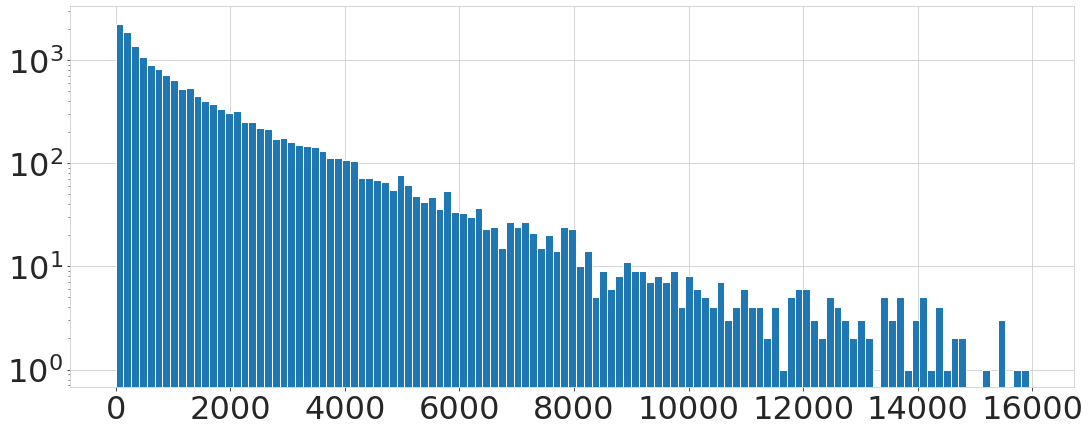

In [4]:
plt.hist(g_2015.degree(), log=True, bins='auto');

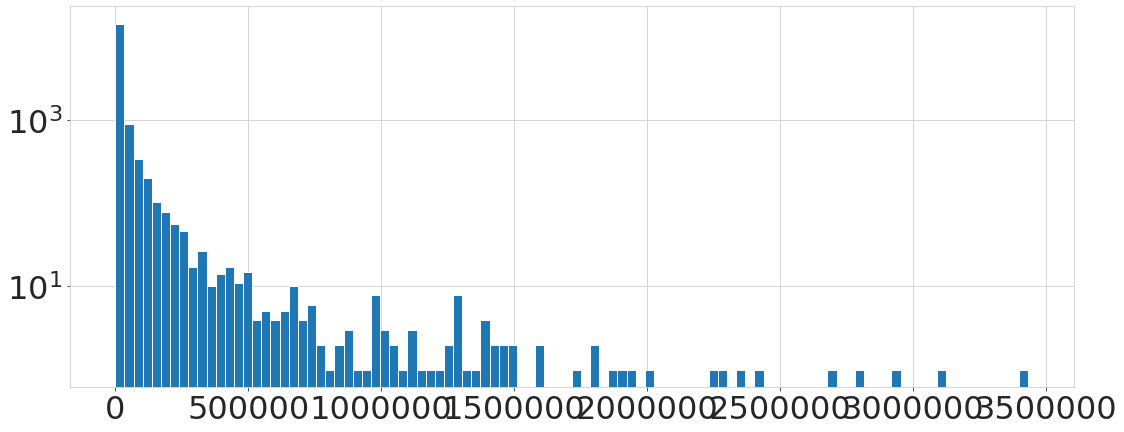

In [5]:
plt.hist(g_2015.vs['strength'], log=True, bins=100);

In [6]:
weight_s = pd.Series(g_2015.es['weight'])
print(weight_s.sum())
weight_s.describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

195440003.0


count    1.265801e+07
mean     1.544003e+01
std      1.216045e+02
min      1.000000e+00
1%       1.000000e+00
5%       1.000000e+00
10%      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      6.000000e+00
90%      2.200000e+01
95%      4.900000e+01
99%      2.240000e+02
max      2.894600e+04
dtype: float64

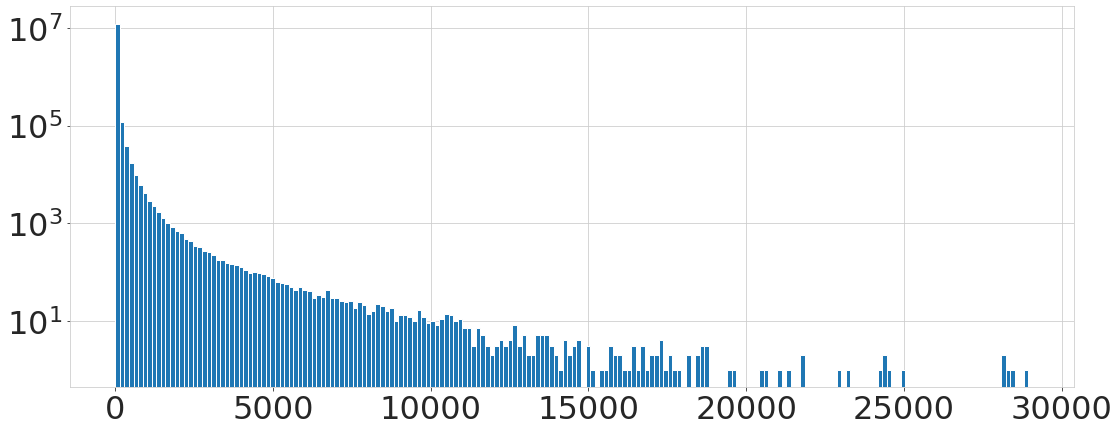

In [7]:
weight_s.hist(log=True, bins=200);

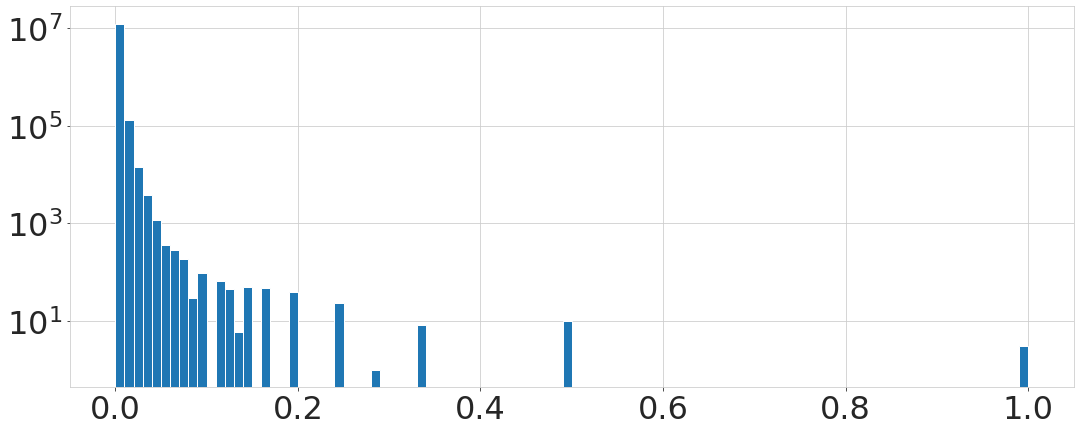

In [8]:
plt.hist(g_2015.es['norm_weight'], log=True, bins=100);

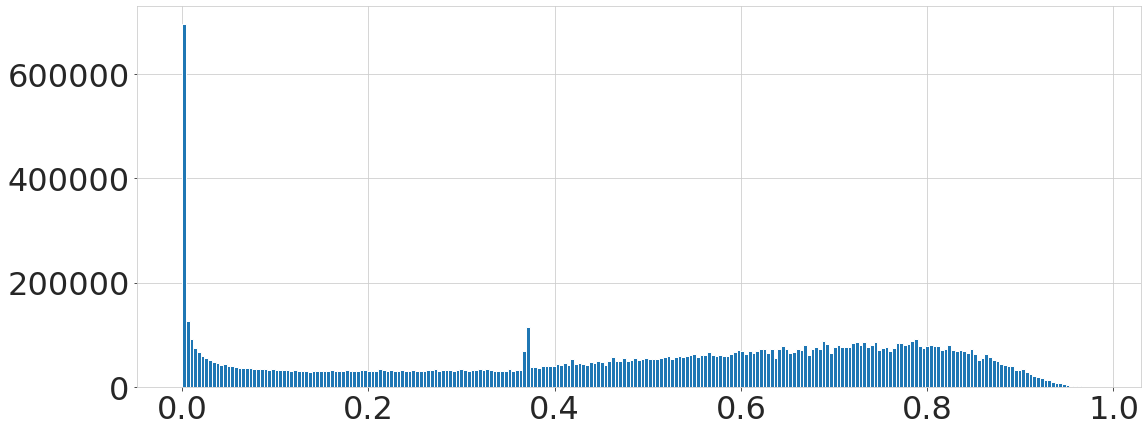

In [9]:
plt.hist(g_2015.es['alpha'], bins='auto');

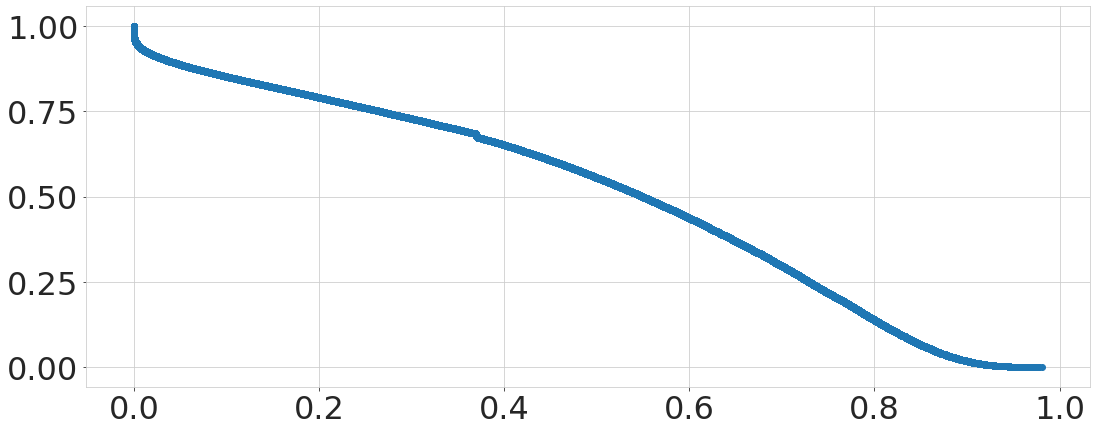

In [10]:
plt.scatter(g_2015.es['alpha'], g_2015.es['alpha_p_value']);

In [11]:
g_2015.density()

0.09121607944456371

In [12]:
np.mean(g_2015.degree())

1519.5686674669869

In [13]:
min(g_2015.degree())

1

In [14]:
max(g_2015.degree())

15935

In [93]:
g_2015.average_path_length(directed=False)

1.9099506901626129

In [94]:
g_2015.diameter(directed=False)

4

In [15]:
g_2015.transitivity_avglocal_undirected()

0.7716885660064594

In [ ]:
g_2015.transitivity_avglocal_undirected(weights='weight')

In [16]:
g_2015.transitivity_undirected()

0.3813372425682248

In [17]:
g_2015.assortativity_degree(directed=False)

-0.3254339292773449

In [18]:
np.mean(g_2015.knn()[0])

5513.8674571093015

In [19]:
np.mean(g_2015.knn(weights='weight')[0])

165870.46757593527

In [95]:
np.mean(g_2015.betweenness(directed=False))

7579.434273709486

In [96]:
np.mean(g_2015.betweenness(directed=False, weights='weight'))

8114.833808121512

In [20]:
ERG = igraph.Graph.Erdos_Renyi(n=g_2015.vcount(), m=g_2015.ecount())

In [21]:
P_k = g_2015.degree_distribution()
P_k = {dd[0]: dd[-1] for dd in P_k.bins()}
P_k = pd.Series(P_k)
len(P_k)

15935

In [22]:
ER_P_k = ERG.degree_distribution()
ER_P_k = {dd[0]: dd[-1] for dd in ER_P_k.bins()}
ER_P_k = pd.Series(ER_P_k)
len(ER_P_k)

302

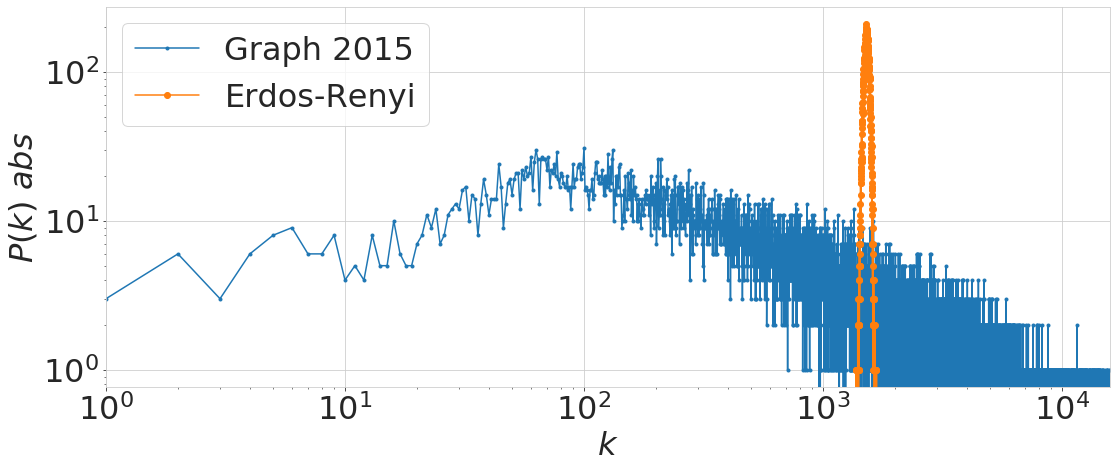

In [23]:
P_k.plot(loglog=True, marker='.')
ER_P_k.plot(loglog=True, marker='o');
# BA_P_k.plot(loglog=True, marker='x');
plt.xlabel('$k$', size=32)
plt.ylabel('$P(k)~abs$', size=32)
plt.legend(['Graph 2015', 'Erdos-Renyi', 'Barabási–Albert'])
# plt.savefig('results/P_k.pdf', bbox_inches='tight')

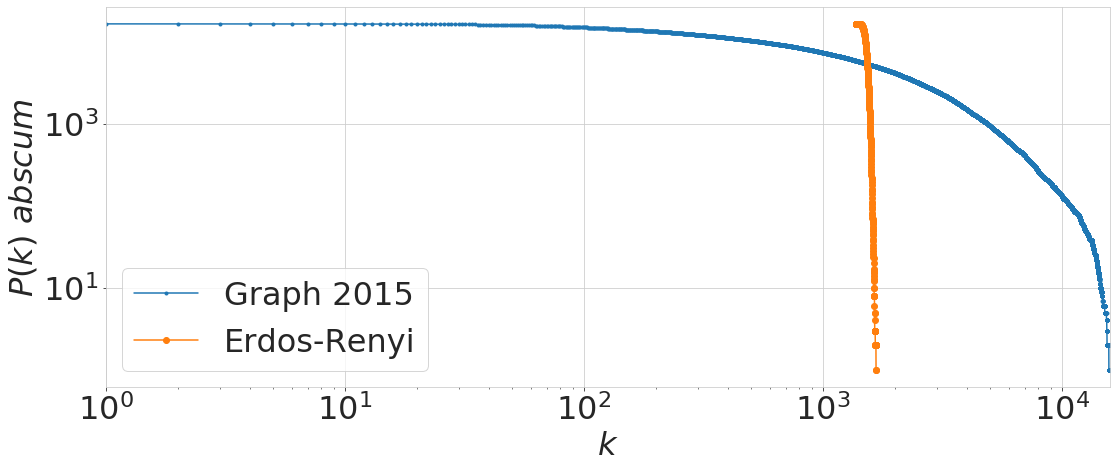

In [24]:
P_k[::-1].cumsum().plot(loglog=True, marker='.')
ER_P_k[::-1].cumsum().plot(loglog=True, marker='o')
# BA_P_k[::-1].cumsum().plot(loglog=True, marker='x')
plt.xlabel('$k$', size=32)
plt.ylabel('$P(k)~abs cum$', size=32)
plt.legend(['Graph 2015', 'Erdos-Renyi', 'Barabási–Albert'])
# plt.savefig('results/P_k_cum.pdf', bbox_inches='tight')

In [25]:
g_2015_transitivity_local_undirected = g_2015.transitivity_local_undirected()
len(g_2015_transitivity_local_undirected)

16660

In [26]:
P_C = sorted(map(np.mean, g_2015_transitivity_local_undirected))
P_C = [_ for _ in P_C if not np.isnan(_)]
ER_P_C = sorted(map(np.mean, ERG.transitivity_local_undirected()))
ER_P_C = [_ for _ in ER_P_C if not np.isnan(_)]
# BA_P_C = sorted(map(np.mean, BAG.transitivity_local_undirected()))
# BA_P_C = [_ for _ in BA_P_C if not np.isnan(_)]
len(P_C), len(ER_P_C)#, len(BA_P_C)

(16657, 16660)

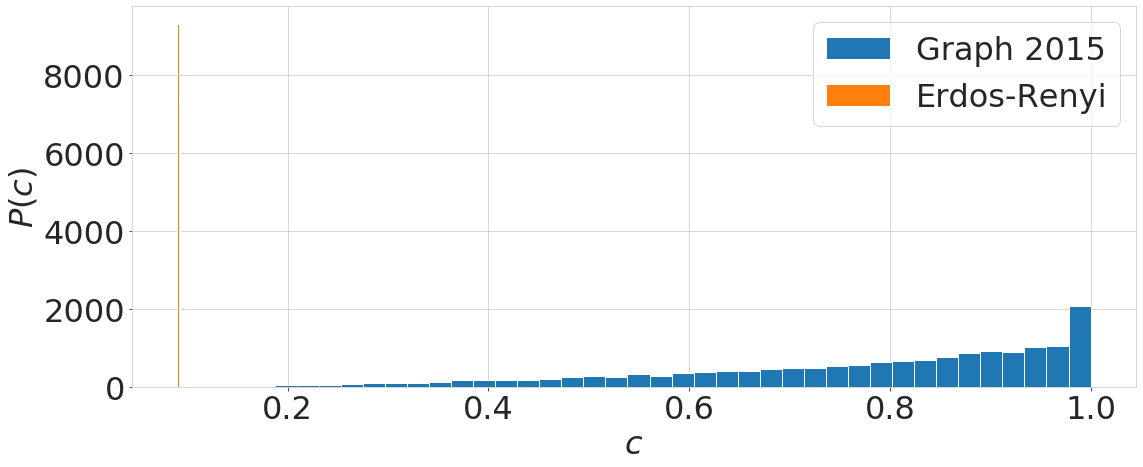

In [27]:
plt.hist(P_C, bins='auto')
plt.hist(ER_P_C, bins=2)
# plt.hist(BA_P_C, bins='auto')
plt.xlabel('$c$', size=32)
plt.ylabel('$P(c)$', size=32)
plt.legend(['Graph 2015', 'Erdos-Renyi', 'Barabási–Albert']);

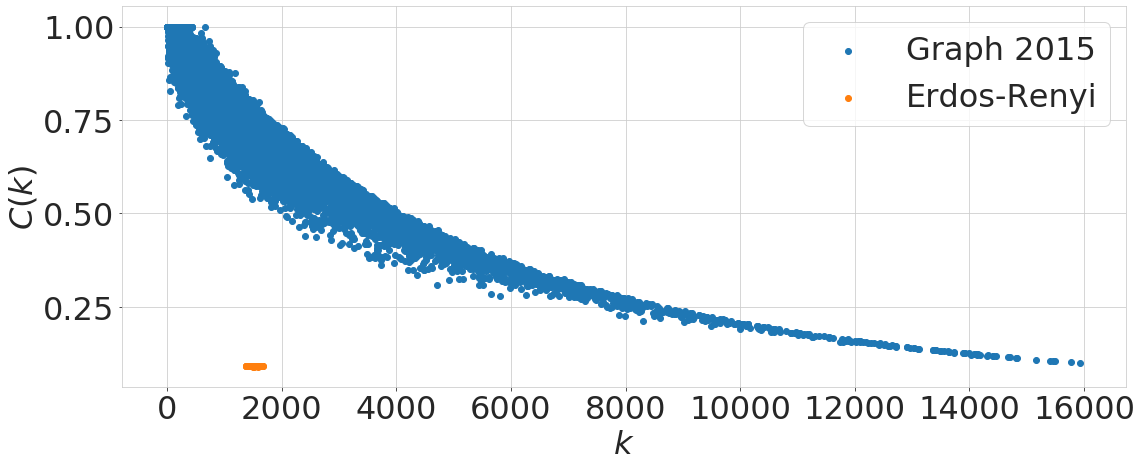

In [28]:
Y = [_ for _ in g_2015_transitivity_local_undirected if not np.isnan(_)]
X = [_ for _ in g_2015.degree() if _ > 1]  # 2+, ommit 1
plt.scatter(X, Y)
Y = [_ for _ in ERG.transitivity_local_undirected() if not np.isnan(_)]
X = [_ for _ in ERG.degree() if _ > 1]  # 2+, ommit 1
plt.scatter(X, Y)
plt.xlabel('$k$', size=32)
plt.ylabel('$C(k)$', size=32)
plt.legend(['Graph 2015', 'Erdos-Renyi', 'Barabási–Albert'])
# plt.savefig('results/C_k.pdf', bbox_inches='tight')

### filtred by weight

We set stat. sign. weight == 10 (might be change)

In [82]:
ew_threshold = 10

In [83]:
g_2015_filtered = g_2015.subgraph_edges(g_2015.es.select(weight_gt=ew_threshold))
g_2015_filtered.vcount(), g_2015_filtered.ecount()

(10770, 2227384)

% of total links left

In [84]:
g_2015_filtered.ecount() / g_2015.ecount()

0.17596640608588698

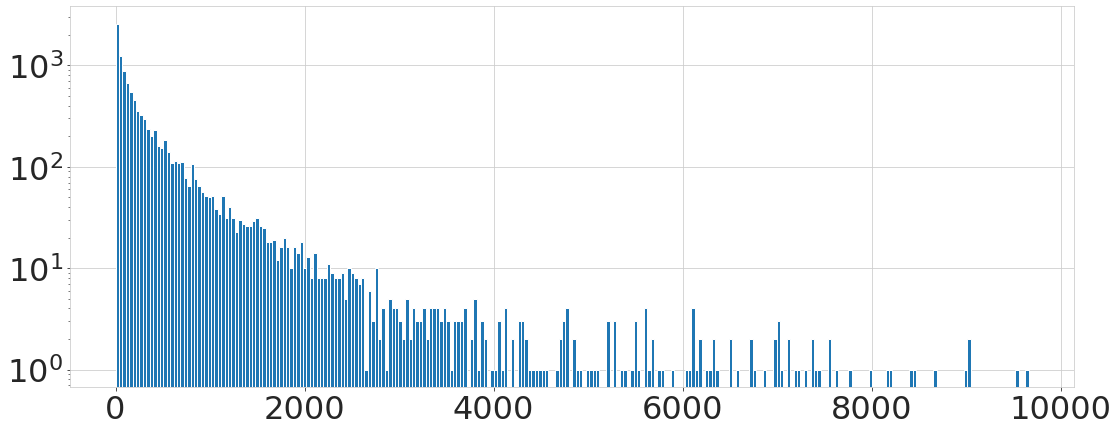

In [31]:
plt.hist(g_2015_filtered.degree(), log=True, bins='auto');

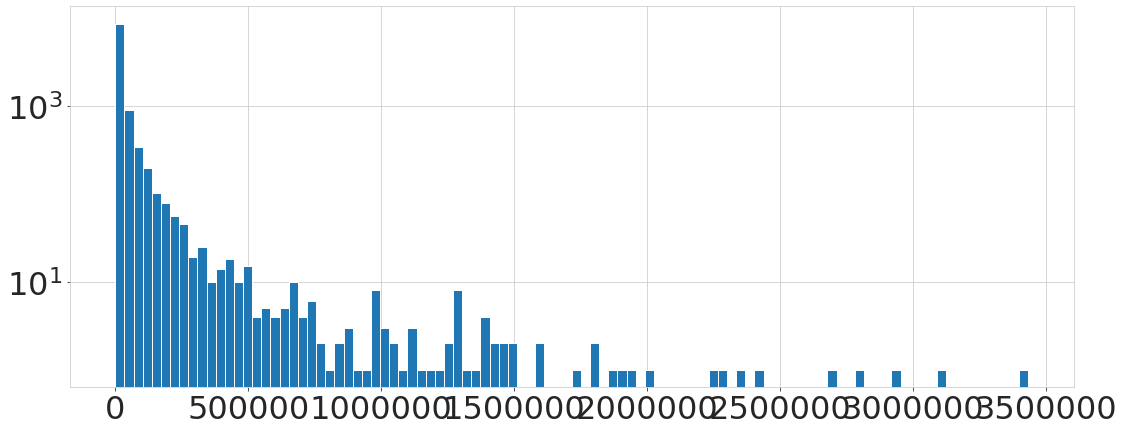

In [32]:
plt.hist(g_2015_filtered.vs['strength'], log=True, bins=100);

In [33]:
weight_s = pd.Series(g_2015_filtered.es['weight'])
print(weight_s.sum())
weight_s.describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

168972088.0


count    2.227384e+06
mean     7.586123e+01
std      2.821053e+02
min      1.100000e+01
1%       1.100000e+01
5%       1.100000e+01
10%      1.200000e+01
25%      1.500000e+01
50%      2.600000e+01
75%      5.700000e+01
90%      1.380000e+02
95%      2.490000e+02
99%      8.220000e+02
max      2.894600e+04
dtype: float64

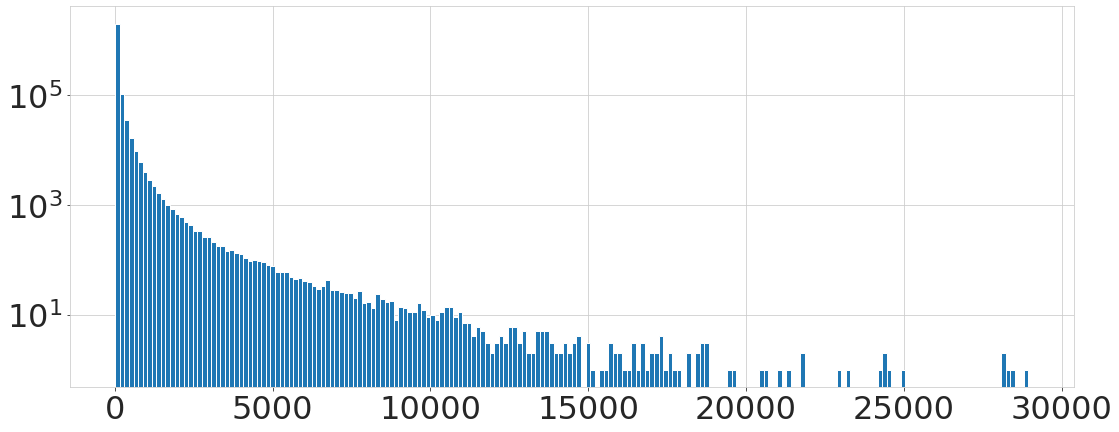

In [34]:
weight_s.hist(log=True, bins=200);

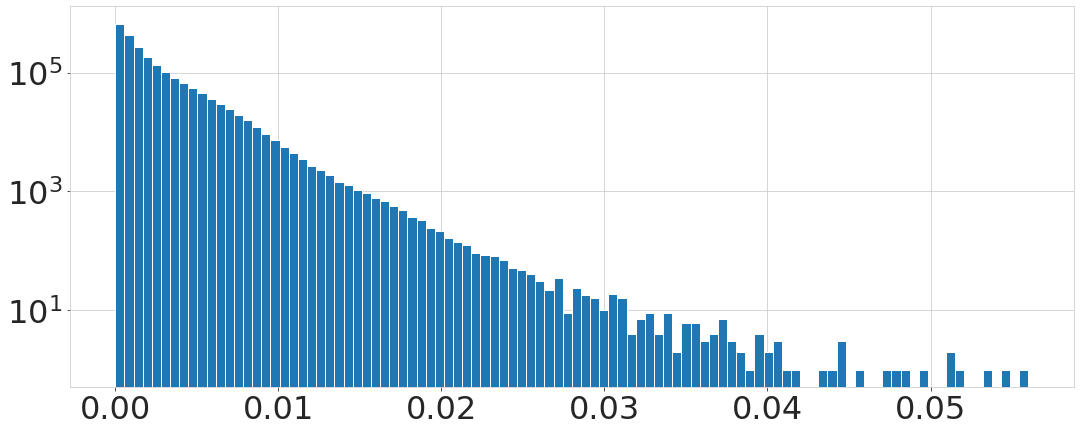

In [35]:
plt.hist(g_2015_filtered.es['norm_weight'], log=True, bins=100);

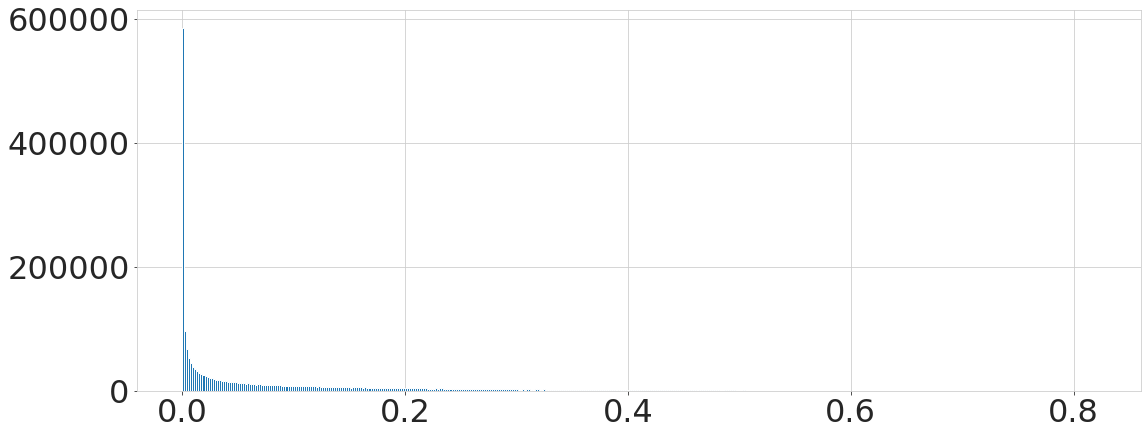

In [36]:
plt.hist(g_2015_filtered.es['alpha'], bins='auto');

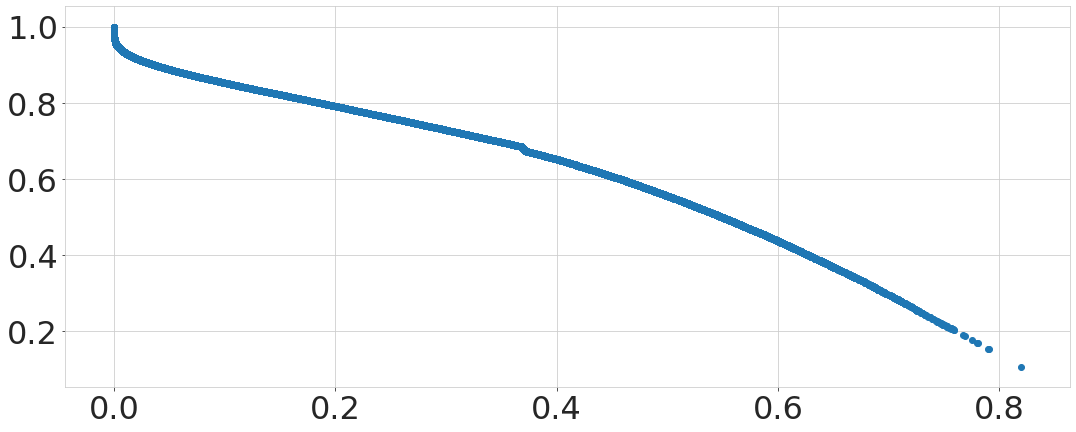

In [37]:
plt.scatter(g_2015_filtered.es['alpha'], g_2015_filtered.es['alpha_p_value']);

In [38]:
g_2015_filtered.density()

0.03840908940023778

In [39]:
np.mean(g_2015_filtered.degree())

413.62748375116064

In [40]:
min(g_2015_filtered.degree())

1

In [41]:
max(g_2015_filtered.degree())

9661

In [ ]:
g_2015_filtered.average_path_length(directed=False)

In [ ]:
g_2015_filtered.diameter(directed=False)

In [42]:
g_2015_filtered.transitivity_avglocal_undirected()

0.8900126604674158

In [ ]:
g_2015_filtered.transitivity_avglocal_undirected(weights='weight')

In [43]:
g_2015_filtered.transitivity_undirected()

0.2807878222415666

In [44]:
g_2015_filtered.assortativity_degree(directed=False)

-0.3822249504595214

In [45]:
np.mean(g_2015_filtered.knn()[0])

4015.337513780647

In [46]:
np.mean(g_2015_filtered.knn(weights='weight')[0])

45834.47878026697

In [ ]:
np.mean(g_2015_filtered.betweenness(directed=False))

In [ ]:
np.mean(g_2015_filtered.betweenness(directed=False, weights='weight'))

In [47]:
ERG = igraph.Graph.Erdos_Renyi(n=g_2015_filtered.vcount(), m=g_2015_filtered.ecount())

In [48]:
P_k = g_2015_filtered.degree_distribution()
P_k = {dd[0]: dd[-1] for dd in P_k.bins()}
P_k = pd.Series(P_k)
len(P_k)

9661

In [49]:
ER_P_k = ERG.degree_distribution()
ER_P_k = {dd[0]: dd[-1] for dd in ER_P_k.bins()}
ER_P_k = pd.Series(ER_P_k)
len(ER_P_k)

146

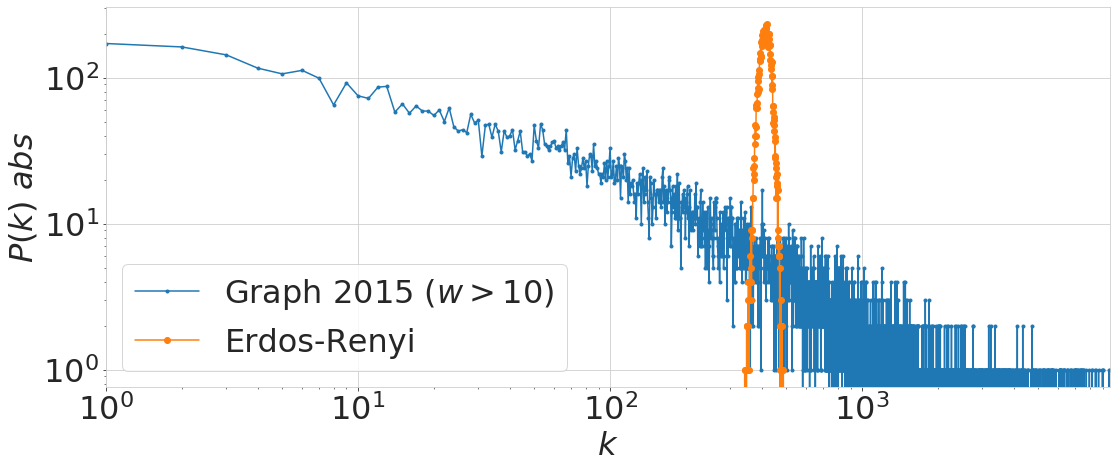

In [50]:
P_k.plot(loglog=True, marker='.')
ER_P_k.plot(loglog=True, marker='o');
# BA_P_k.plot(loglog=True, marker='x');
plt.xlabel('$k$', size=32)
plt.ylabel('$P(k)~abs$', size=32)
plt.legend([fr'Graph 2015 ($w > {ew_threshold}$)', 'Erdos-Renyi', 'Barabási–Albert'])
# plt.savefig('results/P_k_filtered.pdf', bbox_inches='tight')

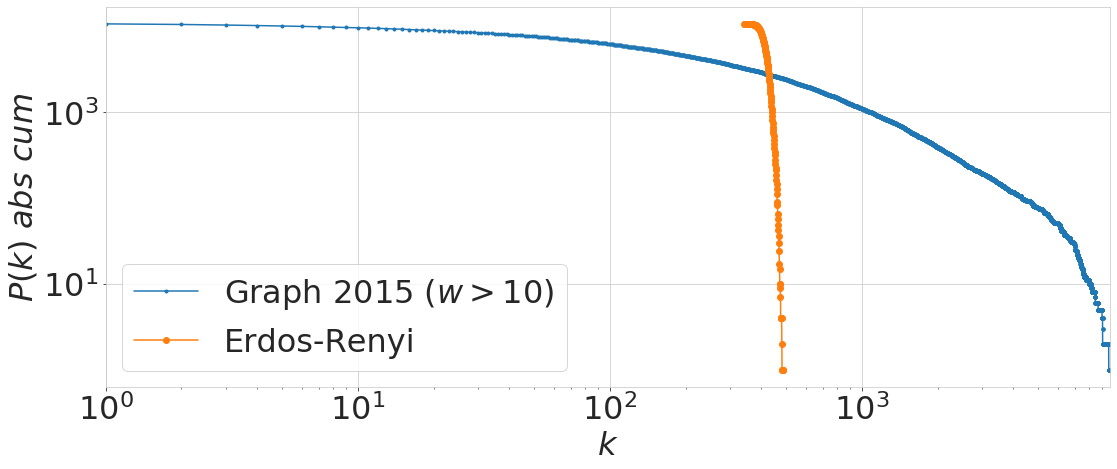

In [51]:
P_k[::-1].cumsum().plot(loglog=True, marker='.')
ER_P_k[::-1].cumsum().plot(loglog=True, marker='o')
# BA_P_k[::-1].cumsum().plot(loglog=True, marker='x')
plt.xlabel('$k$', size=32)
plt.ylabel('$P(k)~abs~cum$', size=32)
plt.legend([fr'Graph 2015 ($w > {ew_threshold}$)', 'Erdos-Renyi', 'Barabási–Albert'])
# plt.savefig('results/P_k_cum_filtered.pdf', bbox_inches='tight')

In [52]:
g_2015_filtered_transitivity_local_undirected = g_2015_filtered.transitivity_local_undirected()
len(g_2015_filtered_transitivity_local_undirected)

10770

In [53]:
P_C = sorted(map(np.mean, g_2015_filtered_transitivity_local_undirected))
P_C = [_ for _ in P_C if not np.isnan(_)]
ER_P_C = sorted(map(np.mean, ERG.transitivity_local_undirected()))
ER_P_C = [_ for _ in ER_P_C if not np.isnan(_)]
# BA_P_C = sorted(map(np.mean, BAG.transitivity_local_undirected()))
# BA_P_C = [_ for _ in BA_P_C if not np.isnan(_)]
len(P_C), len(ER_P_C)#, len(BA_P_C)

(10599, 10770)

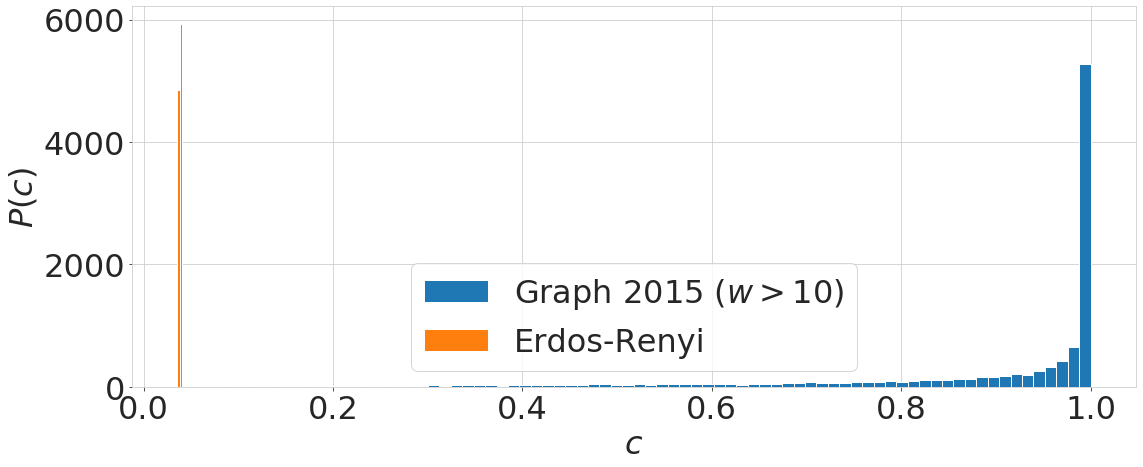

In [54]:
plt.hist(P_C, bins='auto')
plt.hist(ER_P_C, bins=2)
# plt.hist(BA_P_C, bins='auto')
plt.xlabel('$c$', size=32)
plt.ylabel('$P(c)$', size=32)
plt.legend([fr'Graph 2015 ($w > {ew_threshold}$)', 'Erdos-Renyi', 'Barabási–Albert']);

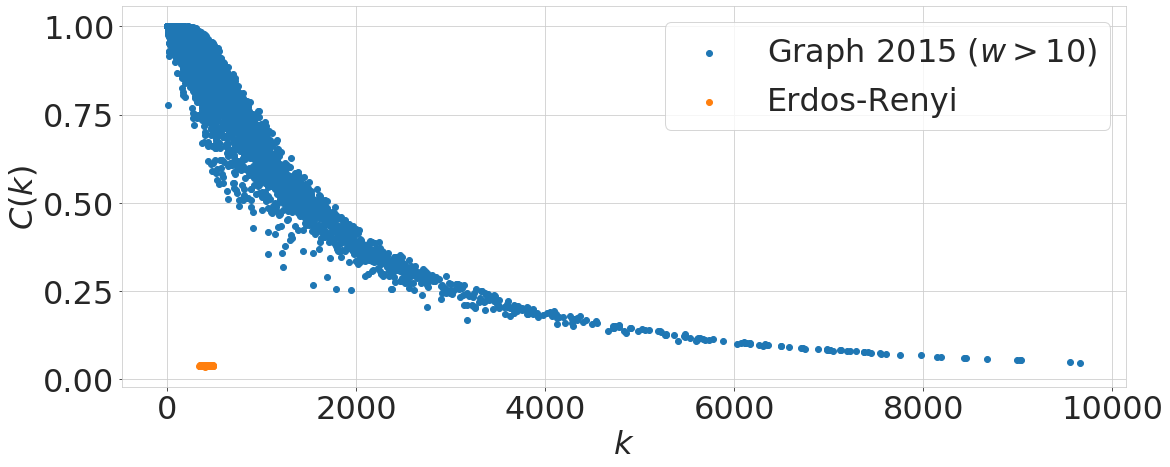

In [55]:
Y = [_ for _ in g_2015_filtered_transitivity_local_undirected if not np.isnan(_)]
X = [_ for _ in g_2015_filtered.degree() if _ > 1]  # 2+, ommit 1
plt.scatter(X, Y)
Y = [_ for _ in ERG.transitivity_local_undirected() if not np.isnan(_)]
X = [_ for _ in ERG.degree() if _ > 1]  # 2+, ommit 1
plt.scatter(X, Y)
plt.xlabel('$k$', size=32)
plt.ylabel('$C(k)$', size=32)
plt.legend([fr'Graph 2015 ($w > {ew_threshold}$)', 'Erdos-Renyi', 'Barabási–Albert'])
# plt.savefig('results/C_k_filtered.pdf', bbox_inches='tight')

### filtred by alpha

We set stat. sign. p-value for alpha top 15% (might be change)

In [36]:
ea_threshold = .1

In [37]:
g_2015_filtered = g_2015.subgraph_edges(g_2015.es.select(alpha_lt=ea_threshold))
g_2015_filtered.vcount(), g_2015_filtered.ecount()

(13969, 1869488)

In [38]:
g_2015_filtered.ecount() / g_2015.ecount()

0.14769212878457091

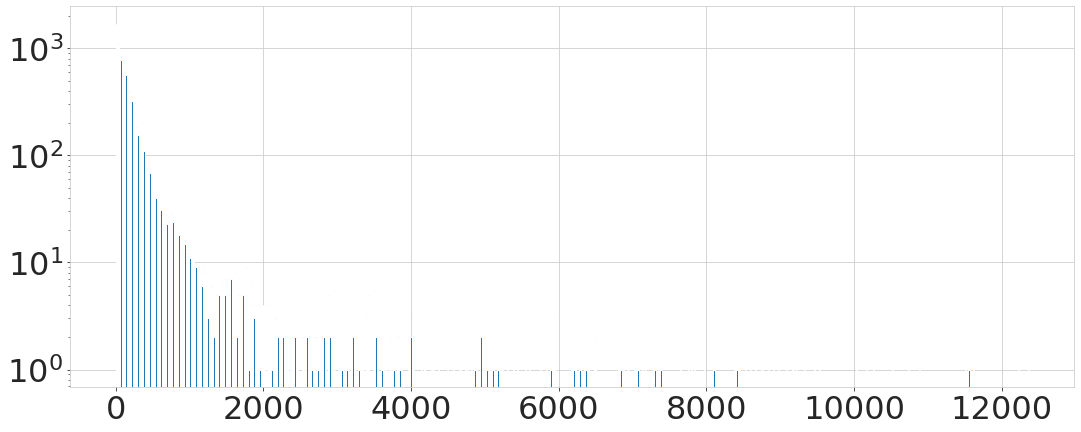

In [39]:
plt.hist(g_2015_filtered.degree(), log=True, bins='auto');

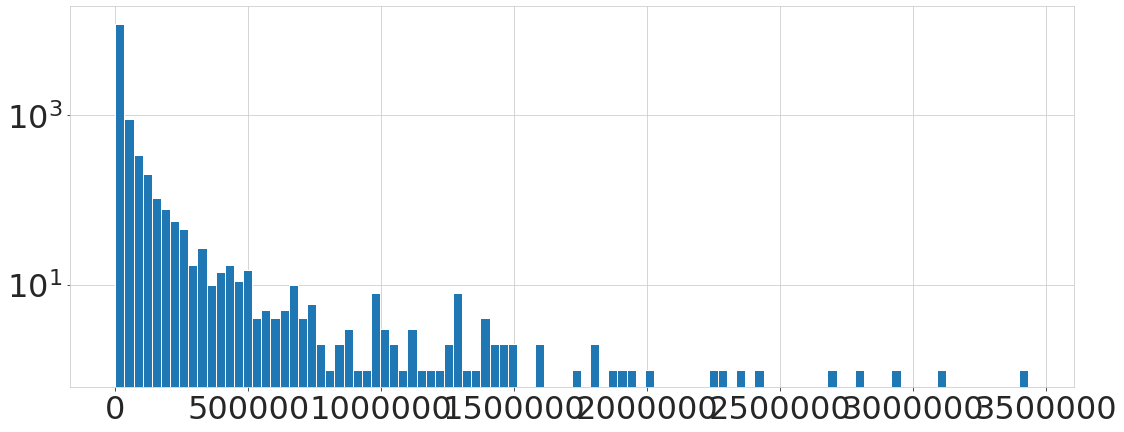

In [40]:
plt.hist(g_2015_filtered.vs['strength'], log=True, bins=100);

In [41]:
weight_s = pd.Series(g_2015_filtered.es['weight'])
print(weight_s.sum())
weight_s.describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

159867587.0


count    1.869488e+06
mean     8.551410e+01
std      3.069969e+02
min      1.000000e+00
1%       4.000000e+00
5%       6.000000e+00
10%      8.000000e+00
25%      1.500000e+01
50%      3.000000e+01
75%      6.800000e+01
90%      1.610000e+02
95%      2.860000e+02
99%      9.260000e+02
max      2.894600e+04
dtype: float64

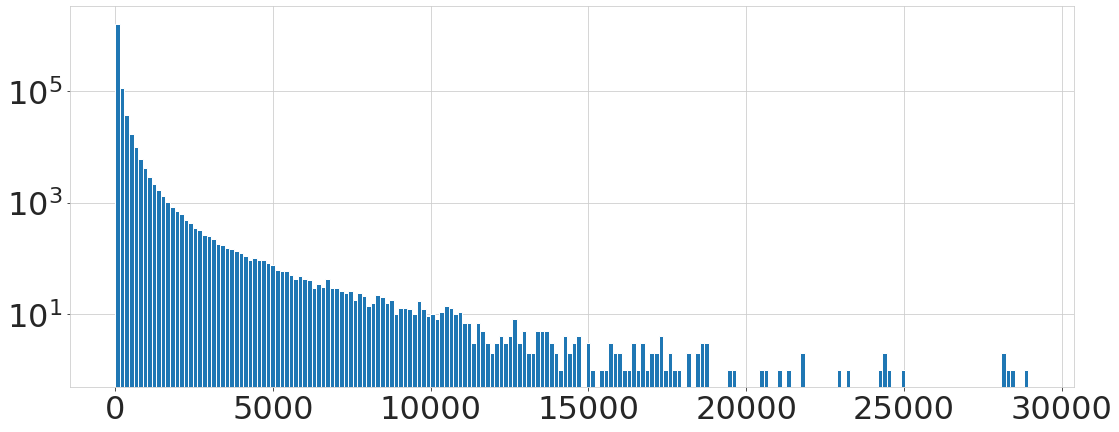

In [42]:
weight_s.hist(log=True, bins=200);

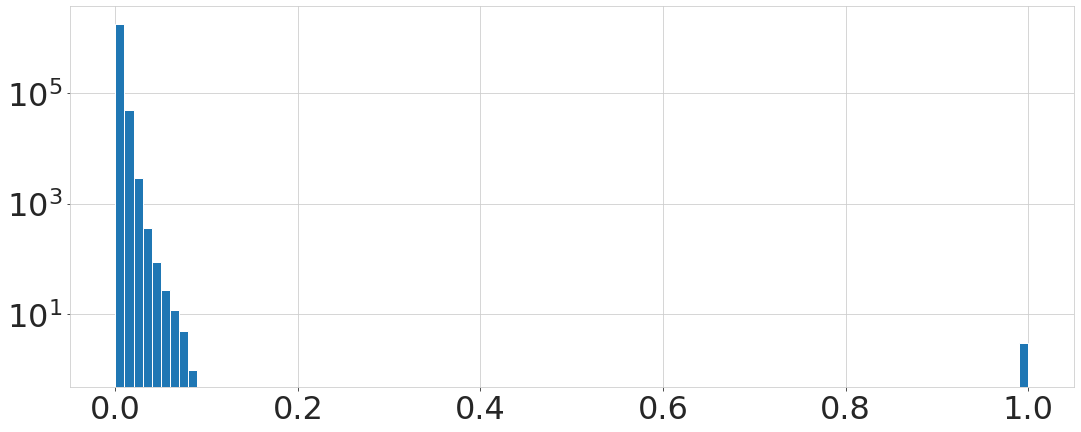

In [43]:
plt.hist(g_2015_filtered.es['norm_weight'], log=True, bins=100);

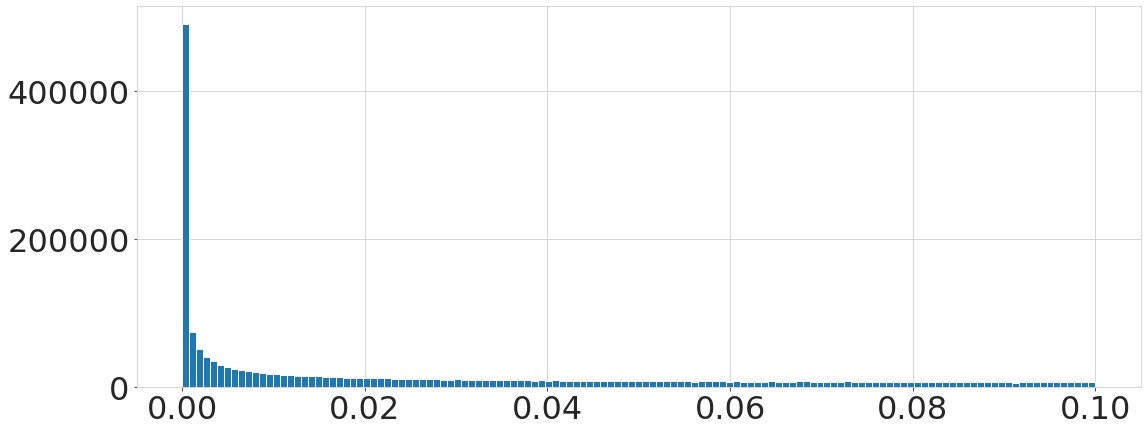

In [44]:
plt.hist(g_2015_filtered.es['alpha'], bins='auto');

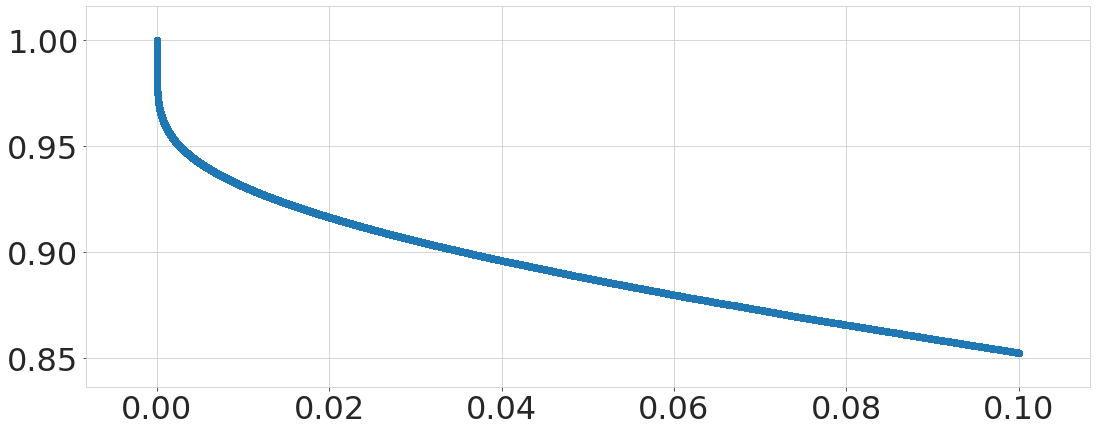

In [45]:
plt.scatter(g_2015_filtered.es['alpha'], g_2015_filtered.es['alpha_p_value']);

In [46]:
g_2015_filtered.density()

0.019162542619121363

In [47]:
np.mean(g_2015_filtered.degree())

267.6623953038872

In [48]:
min(g_2015_filtered.degree())

1

In [49]:
max(g_2015_filtered.degree())

12367

In [50]:
g_2015_filtered.average_path_length(directed=False)

2.004189679290676

In [51]:
g_2015_filtered.diameter(directed=False)

5

In [52]:
g_2015_filtered.transitivity_avglocal_undirected()

0.8934871610945831

In [ ]:
g_2015_filtered.transitivity_avglocal_undirected(weights='weight')

In [53]:
g_2015_filtered.transitivity_undirected()

0.13887924954180966

In [54]:
g_2015_filtered.assortativity_degree(directed=False)

-0.36848216542038553

In [55]:
np.mean(g_2015_filtered.knn()[0])

4545.138557123076

In [56]:
np.mean(g_2015_filtered.knn(weights='weight')[0])

103279.4108339776

In [ ]:
np.mean(g_2015_filtered.betweenness(directed=False))

In [ ]:
np.mean(g_2015_filtered.betweenness(directed=False, weights='weight'))

In [57]:
ERG = igraph.Graph.Erdos_Renyi(n=g_2015_filtered.vcount(), m=g_2015_filtered.ecount())

In [58]:
P_k = g_2015_filtered.degree_distribution()
P_k = {dd[0]: dd[-1] for dd in P_k.bins()}
P_k = pd.Series(P_k)
len(P_k)

12367

In [59]:
ER_P_k = ERG.degree_distribution()
ER_P_k = {dd[0]: dd[-1] for dd in ER_P_k.bins()}
ER_P_k = pd.Series(ER_P_k)
len(ER_P_k)

124

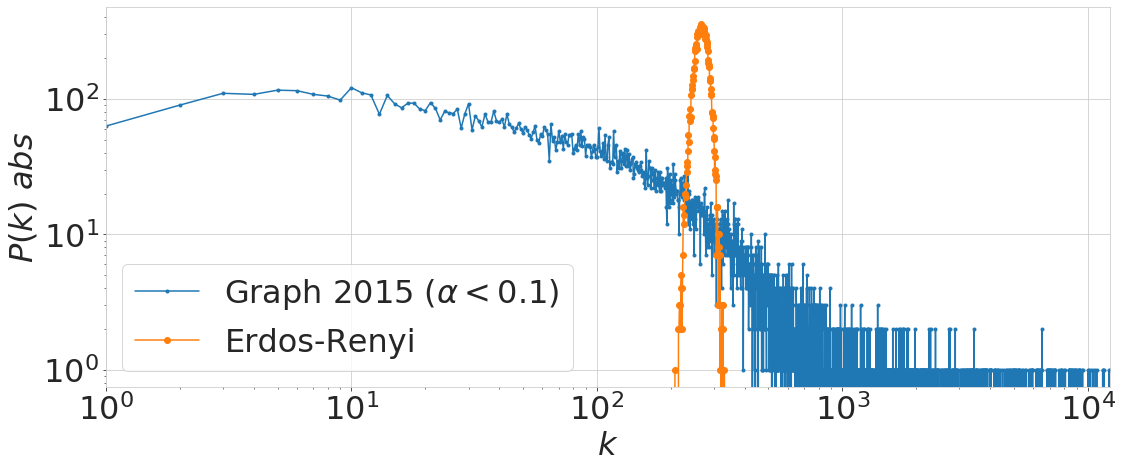

In [60]:
P_k.plot(loglog=True, marker='.')
ER_P_k.plot(loglog=True, marker='o');
# BA_P_k.plot(loglog=True, marker='x');
plt.xlabel('$k$', size=32)
plt.ylabel('$P(k)~abs$', size=32)
plt.legend([fr'Graph 2015 ($\alpha < {ea_threshold}$)', 'Erdos-Renyi', 'Barabási–Albert']);
# plt.savefig('results/P_k.pdf', bbox_inches='tight')

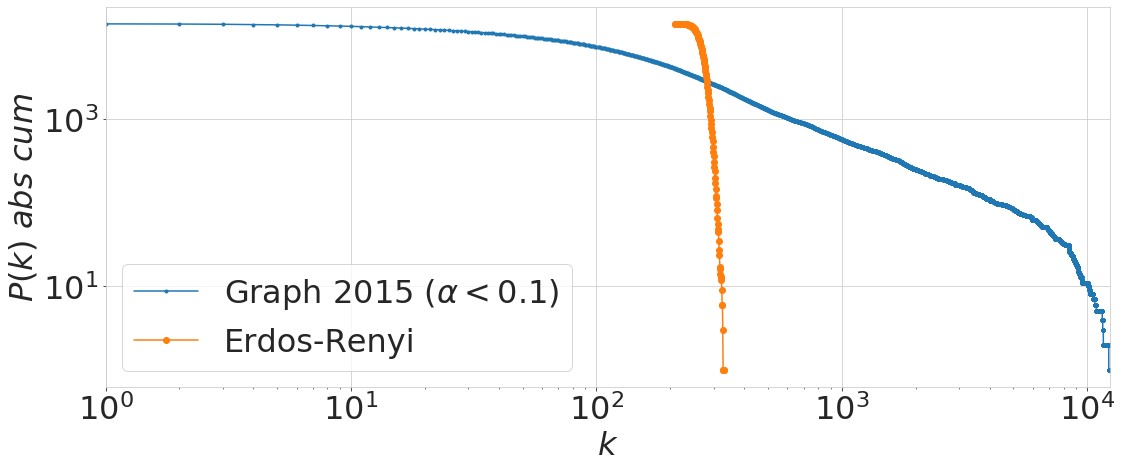

In [61]:
P_k[::-1].cumsum().plot(loglog=True, marker='.')
ER_P_k[::-1].cumsum().plot(loglog=True, marker='o')
# BA_P_k[::-1].cumsum().plot(loglog=True, marker='x')
plt.xlabel('$k$', size=32)
plt.ylabel('$P(k)~abs~cum$', size=32)
plt.legend([fr'Graph 2015 ($\alpha < {ea_threshold}$)', 'Erdos-Renyi', 'Barabási–Albert']);
# plt.savefig('results/P_k_cum.pdf', bbox_inches='tight')

In [62]:
g_2015_filtered_transitivity_local_undirected = g_2015_filtered.transitivity_local_undirected()
len(g_2015_filtered_transitivity_local_undirected)

13969

In [63]:
P_C = sorted(map(np.mean, g_2015_filtered_transitivity_local_undirected))
P_C = [_ for _ in P_C if not np.isnan(_)]
ER_P_C = sorted(map(np.mean, ERG.transitivity_local_undirected()))
ER_P_C = [_ for _ in ER_P_C if not np.isnan(_)]
# BA_P_C = sorted(map(np.mean, BAG.transitivity_local_undirected()))
# BA_P_C = [_ for _ in BA_P_C if not np.isnan(_)]
len(P_C), len(ER_P_C)#, len(BA_P_C)

(13906, 13969)

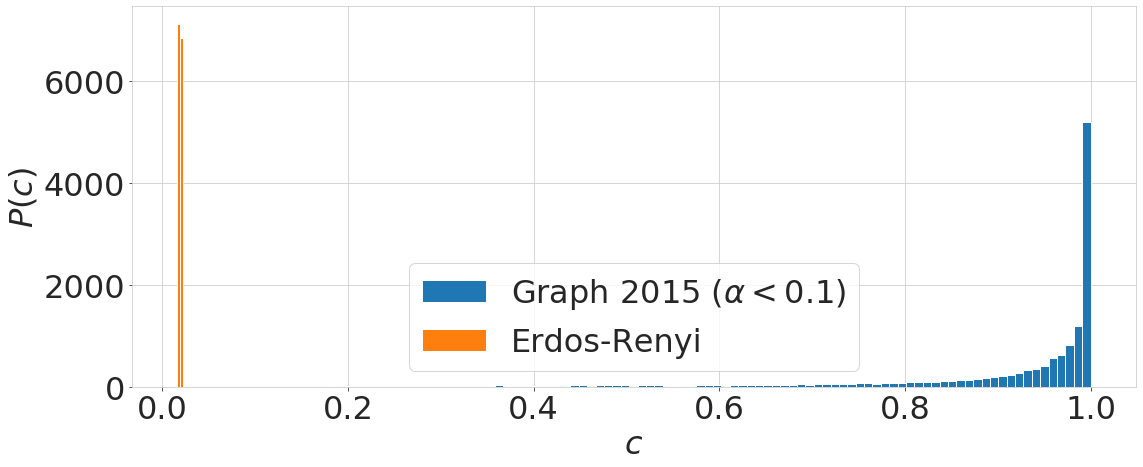

In [64]:
plt.hist(P_C, bins='auto')
plt.hist(ER_P_C, bins=2)
# plt.hist(BA_P_C, bins='auto')
plt.xlabel('$c$', size=32)
plt.ylabel('$P(c)$', size=32)
plt.legend([fr'Graph 2015 ($\alpha < {ea_threshold}$)', 'Erdos-Renyi', 'Barabási–Albert']);

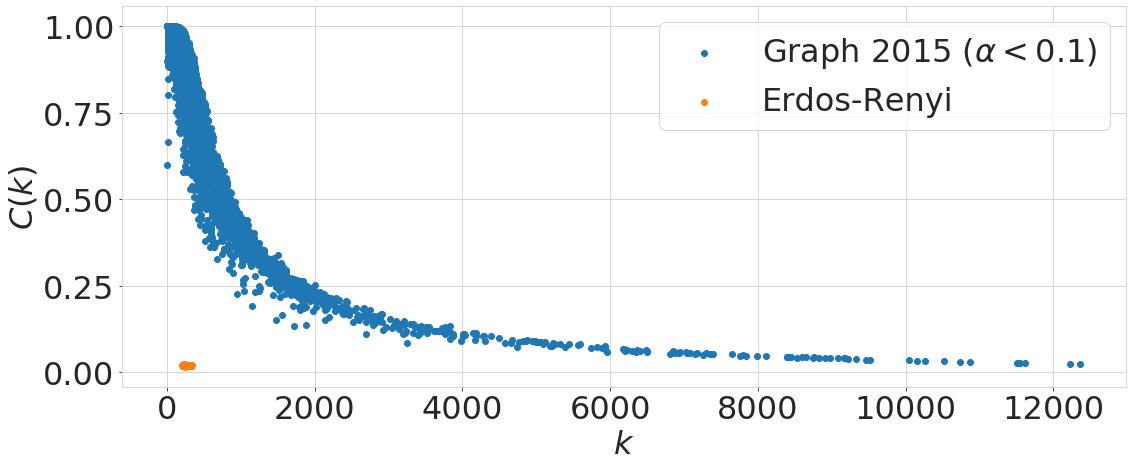

In [65]:
Y = [_ for _ in g_2015_filtered_transitivity_local_undirected if not np.isnan(_)]
X = [_ for _ in g_2015_filtered.degree() if _ > 1]  # 2+, ommit 1
plt.scatter(X, Y)
Y = [_ for _ in ERG.transitivity_local_undirected() if not np.isnan(_)]
X = [_ for _ in ERG.degree() if _ > 1]  # 2+, ommit 1
plt.scatter(X, Y)
plt.xlabel('$k$', size=32)
plt.ylabel('$C(k)$', size=32)
plt.legend([fr'Graph 2015 ($\alpha < {ea_threshold}$)', 'Erdos-Renyi', 'Barabási–Albert']);
# plt.savefig('results/C_k_filtered.pdf', bbox_inches='tight')

### form pairs

#### weights

In [12]:
ew_2015 = np.zeros((g_2015.vcount(), g_2015.vcount()))
for e in tn(g_2015.es):
    ew_2015[e.source][e.target] = e['weight']
    ew_2015[e.target][e.source] = e['weight']
# ew_2015 = pd.DataFrame(ew_2015, index=map(lambda x: CONCEPTS_ID_NAME_DICT.get(int(x)), g_2015.vs['name']),
#                        columns=map(lambda x: CONCEPTS_ID_NAME_DICT.get(int(x)), g_2015.vs['name'])).astype(int)
ew_2015 = pd.DataFrame(ew_2015, index=map(int, g_2015.vs['name']),
                       columns=map(int, g_2015.vs['name'])).astype(int)
sorted_names = ew_2015.index[~ew_2015.index.isna()].sort_values()
ew_2015 = ew_2015.loc[sorted_names, sorted_names]
ew_2015.to_pickle('./data/ew_2015_df.pkl')
ew_2015

,3,4,5,6,7,9,10,11,14,15,...,204844,204847,204848,204850,204853,204856,204861,204865,204872,204883
3,0,0,12,0,1,82,26,125,14,0,...,1,1,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,12,0,0,0,0,1,0,5,2,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,82,0,1,0,0,0,6,21,4,0,...,0,1,0,0,0,0,0,0,0,0
10,26,0,0,0,0,6,0,9,3,0,...,0,0,0,0,0,0,0,0,0,0
11,125,0,5,0,0,21,9,0,21,0,...,0,0,0,0,0,0,0,0,1,0
14,14,0,2,0,0,4,3,21,0,2,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
ew_2015_s = ew_2015.where(np.triu(np.ones(ew_2015.shape), 1).astype(np.bool)).stack()
ew_2015_s.to_pickle('./data/ew_2015_s.pkl')
ew_2015_s[ew_2015_s > 0].describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

count    1.265801e+07
mean     1.544003e+01
std      1.216045e+02
min      1.000000e+00
1%       1.000000e+00
5%       1.000000e+00
10%      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      6.000000e+00
90%      2.200000e+01
95%      4.900000e+01
99%      2.240000e+02
max      2.894600e+04
dtype: float64

% of zero weighted pairs

In [14]:
(ew_2015_s == 0).sum() / ew_2015_s.shape[0]

0.9087839205554363

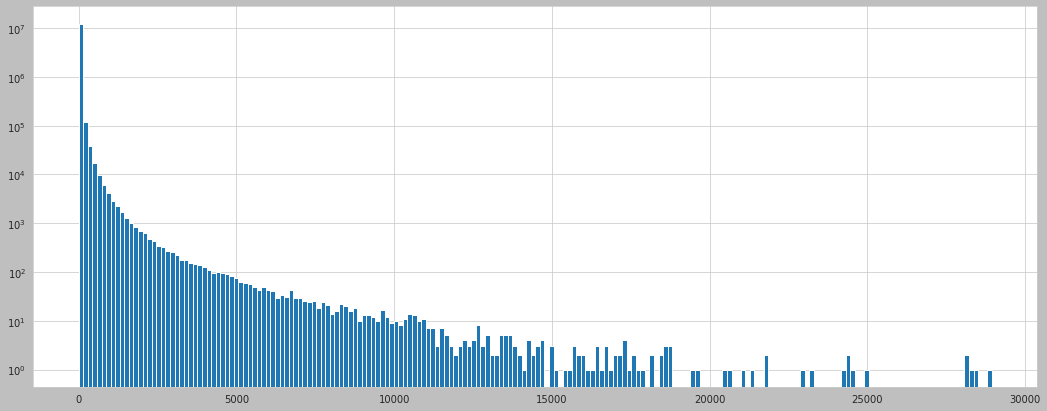

In [15]:
ew_2015_s[ew_2015_s > 0].hist(log=True, bins=200);

#### alpha

In [17]:
ea_2015 = np.ones((g_2015.vcount(), g_2015.vcount()))
for e in tn(g_2015.es):
    ea_2015[e.source][e.target] = e['alpha']
    ea_2015[e.target][e.source] = e['alpha']
# ea_2015 = pd.DataFrame(ea_2015, index=map(lambda x: CONCEPTS_ID_NAME_DICT.get(int(x)), g_2015.vs['name']),
#                        columns=map(lambda x: CONCEPTS_ID_NAME_DICT.get(int(x)), g_2015.vs['name']))
ea_2015 = pd.DataFrame(ea_2015, index=map(int, g_2015.vs['name']),
                       columns=map(int, g_2015.vs['name']))
sorted_names = ea_2015.index[~ea_2015.index.isna()].sort_values()
ea_2015 = ea_2015.loc[sorted_names, sorted_names]
ea_2015.to_pickle('./data/ea_2015_df.pkl')
ea_2015

,3,4,5,6,7,9,10,11,14,15,...,204844,204847,204848,204850,204853,204856,204861,204865,204872,204883
3,1.000000,1.000000,0.098148,1.0,0.685416,0.000019,0.008308,0.000455,0.149340,1.000000,...,0.654482,0.368552,1.000000,0.370826,1.000000,1.000000,1.0,1.0,1.000000,1.0
4,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0
5,0.098148,1.000000,1.000000,1.0,1.000000,0.824225,1.000000,0.380302,0.679332,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0
6,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0
7,0.685416,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0
9,0.000019,1.000000,0.824225,1.0,1.000000,1.000000,0.331506,0.062183,0.580936,1.000000,...,1.000000,0.368552,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0
10,0.008308,1.000000,1.000000,1.0,1.000000,0.331506,1.000000,0.190810,0.575826,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0
11,0.000455,1.000000,0.380302,1.0,1.000000,0.062183,0.190810,1.000000,0.057673,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,0.371389,1.0
14,0.149340,1.000000,0.679332,1.0,1.000000,0.580936,0.575826,0.057673,1.000000,0.425108,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0
15,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.425108,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0


In [18]:
ea_2015_s = ea_2015.where(np.triu(np.ones(ea_2015.shape), 1).astype(np.bool)).stack()
ea_2015_s.to_pickle('./data/ea_2015_s.pkl')
ea_2015_s.describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

count    1.387695e+08
mean     9.537340e-01
std      1.685822e-01
min      0.000000e+00
1%       4.654520e-02
5%       5.887418e-01
10%      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
90%      1.000000e+00
95%      1.000000e+00
99%      1.000000e+00
max      1.000000e+00
dtype: float64

% of zero weighted pairs

In [19]:
(ea_2015_s == 1).sum() / ea_2015_s.shape[0]

0.9087839205554363

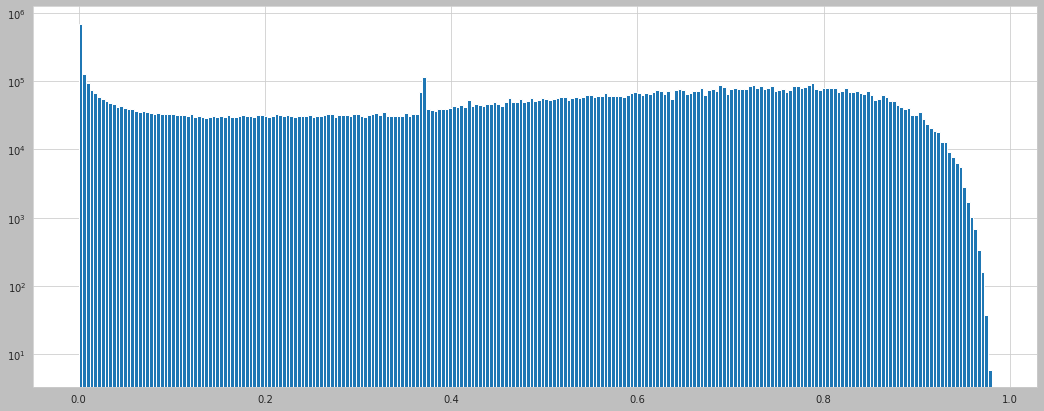

In [20]:
ea_2015_s[ea_2015_s < 1].hist(log=True, bins='auto');

## sandbox

In [9]:
len(set(g_2013.vs['name']) & set(g_2015.vs['name']))

15431

## end

In [ ]:
plt.rcParams['font.size'] = 11
plt.rcParams['figure.facecolor'] = '.75'
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
for c in ['size', 'pad', 'width']:
    for a in ['x', 'y']:
        for t in ['major', 'minor']:
            plt.rcParams[f'{a}tick.{t}.{c}'] /= 2

# plt.rcParams['grid.color'] = '.8'